<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

# <h1 align="center"> Intro to Visualization: Python Basics </h1>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>


Importing libraries

In [ ]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
print(f"Matplotlib Version : {mpl.__version__}")

%matplotlib inline

import seaborn as sns # theme & dataset
print(f"Seaborn Version : {sns.__version__}")

import pandas as pd

Matplotlib Version : 3.10.0
Seaborn Version : 0.13.2


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Execute this at IPython prompt to display figures in new windows:

> %matplotlib

Use this in Jupyter notebooks to display static images inline:

> %matplotlib inline

Use this in Jupyter notebooks to display zoomable images inline:

> %matplotlib notebook

# Load the dataset

In [3]:
# penguins_size.csv
# gdrive_data_url = "https://drive.google.com/file/d/1kMBOkfPbjkEhcZeycIwv_IW0jJ6G1Hd3/view?usp=share_link"
# file_id = gdrive_data_url.split('/')[-2]
# data_file='https://drive.google.com/uc?export=download&id=' + file_id

penguins_size = pd.read_csv("../data/penguins_size.csv")
penguins_size = penguins_size.dropna()
penguins_size = penguins_size[penguins_size["sex"] != "."]
penguins_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
#setting the resolution
# dpi is dots per inch

plt.rcParams['figure.dpi'] = 200

# Anatomy of Graphs

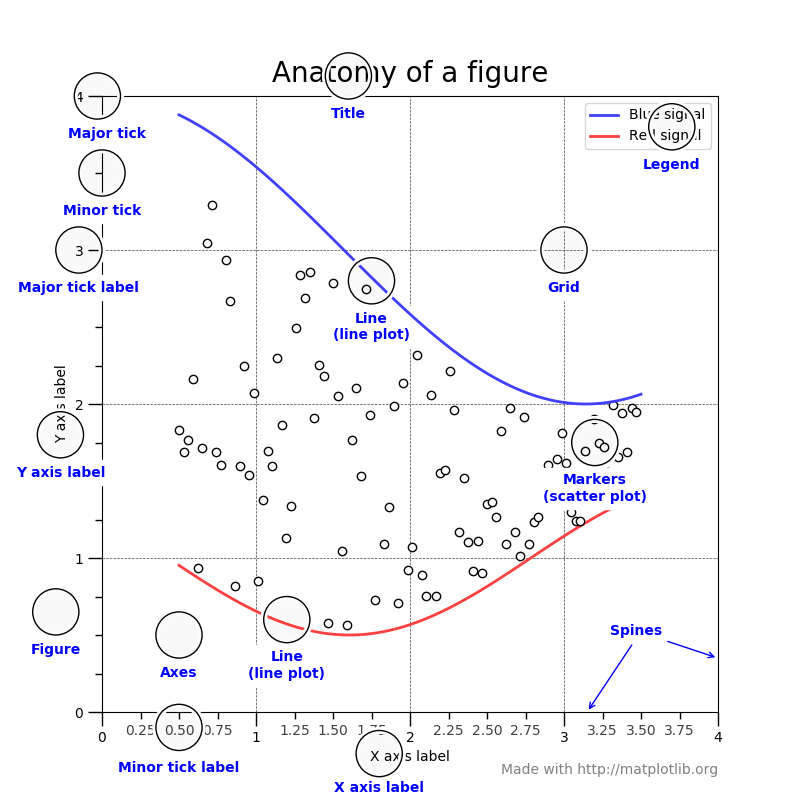

[Source for the picture above](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

# Plotting

fig, ax = plt.subplots( )  this creates a figure paired with axes, this is important when you want to create a plot with several parts.

fig is a container of many elements including the axes. Here you can change the graph size, manage titles and etc...

Axis takes the data and visualizes it.

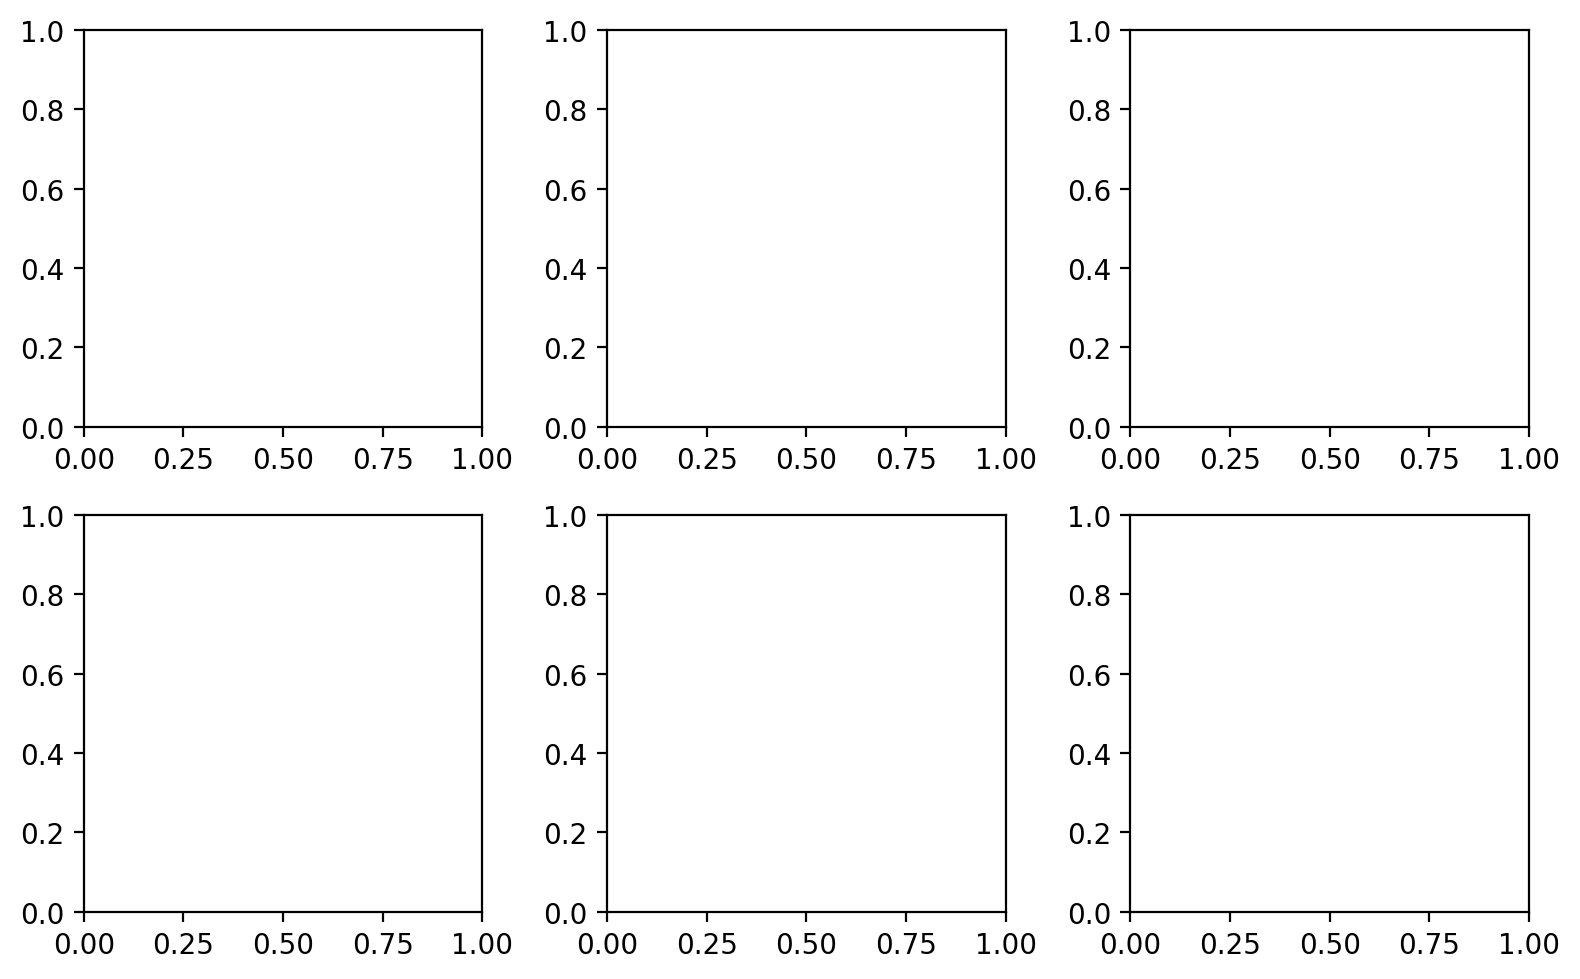

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(8, 5)) # first parameters we specify the number of rows and columns
plt.tight_layout() #without it the graphs will look squshed together (try to comment it and see the difference)
plt.show()

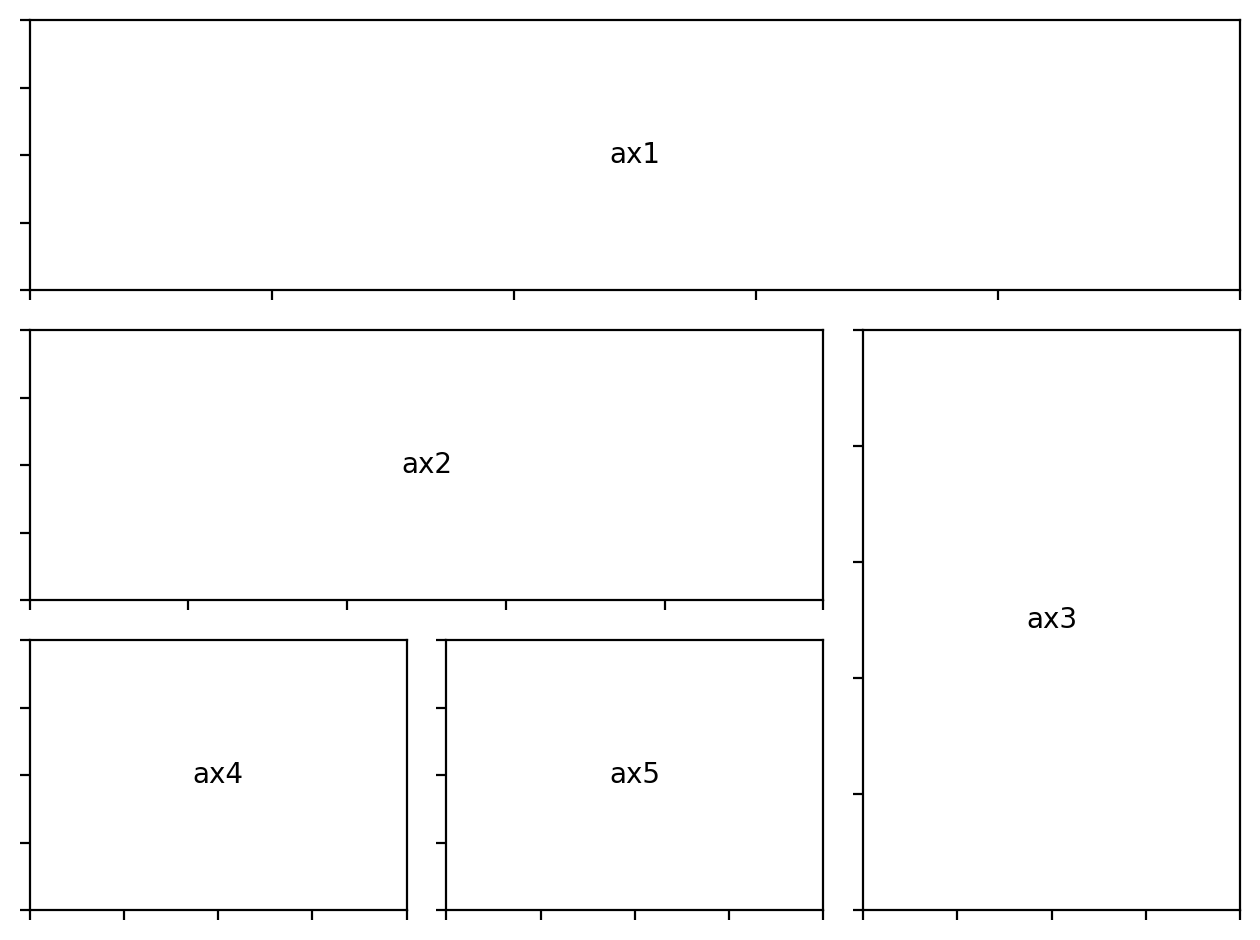

In [ ]:
#subplot2grid

def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

annotate_axes(fig)
fig.tight_layout()
plt.show()

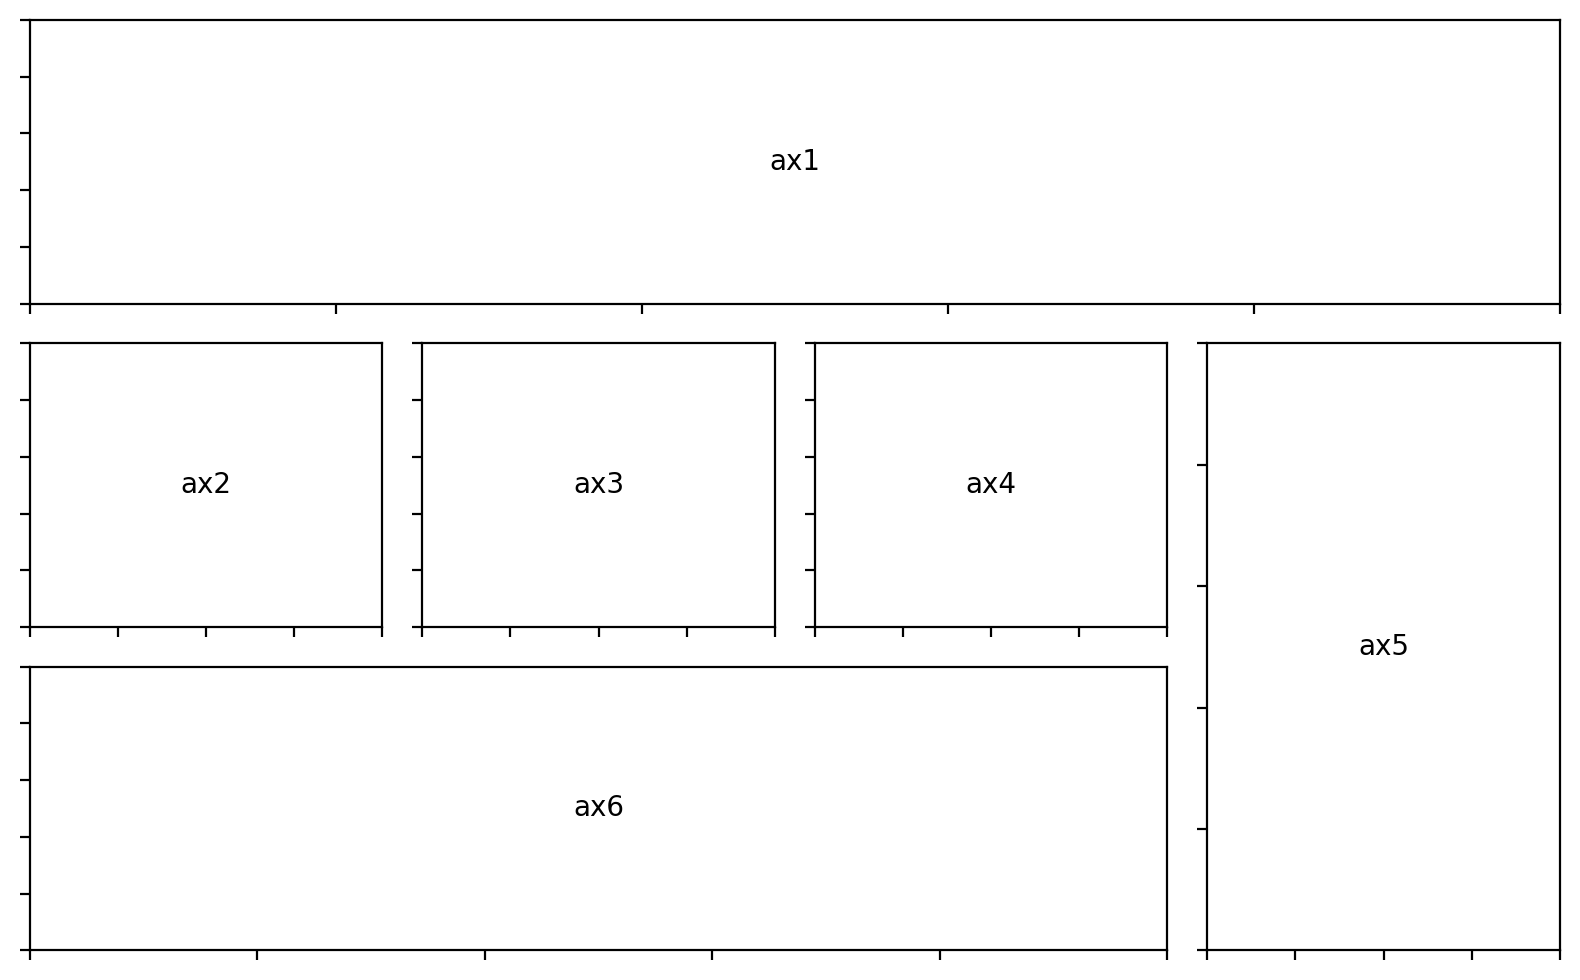

In [ ]:
#or

fig = plt.figure(figsize=(8, 5))

ax1 = plt.subplot2grid((3,4), (0,0), colspan=4)
ax2 = plt.subplot2grid((3,4), (1,0), colspan=1)
ax3 = plt.subplot2grid((3,4), (1,1), colspan=1)
ax4 = plt.subplot2grid((3,4), (1,2), colspan=1)
ax5 = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax6 = plt.subplot2grid((3,4), (2,0), colspan=3)

annotate_axes(fig)
fig.tight_layout()
plt.show()

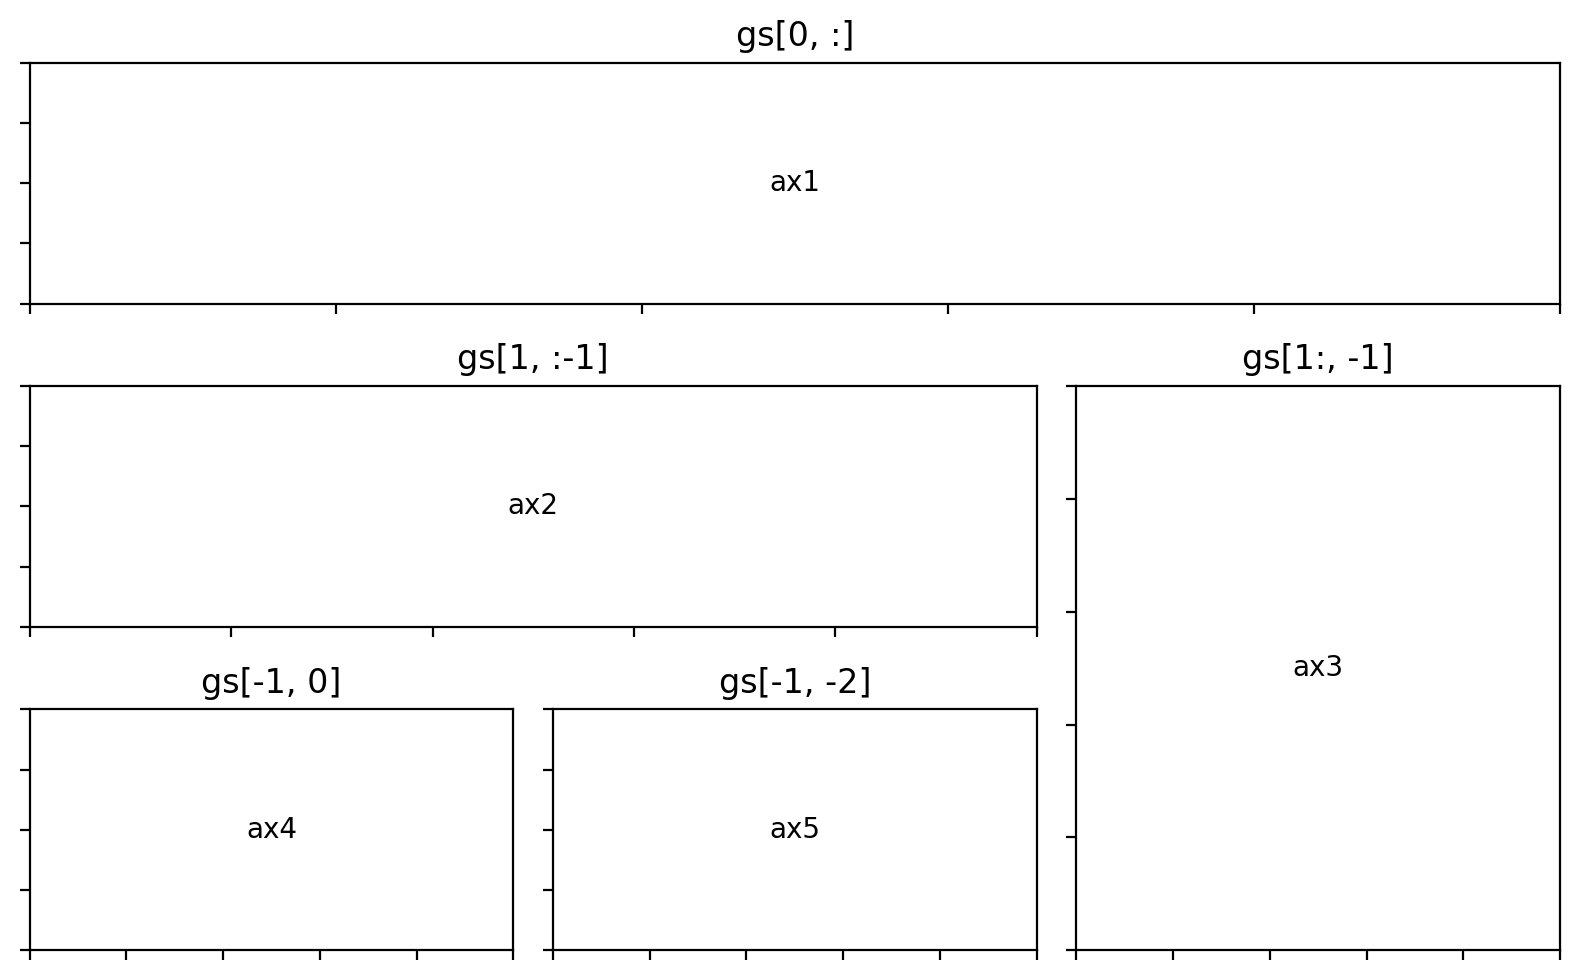

In [ ]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)



ax1 = fig.add_subplot(gs[0, :])
ax1.set_title('gs[0, :]')

ax2 = fig.add_subplot(gs[1, :-1])
ax2.set_title('gs[1, :-1]')

ax3 = fig.add_subplot(gs[1:, -1])
ax3.set_title('gs[1:, -1]')

ax4 = fig.add_subplot(gs[-1, 0])
ax4.set_title('gs[-1, 0]')

ax5 = fig.add_subplot(gs[-1, -2])
ax5.set_title('gs[-1, -2]')

annotate_axes(fig)

plt.tight_layout()
plt.show()

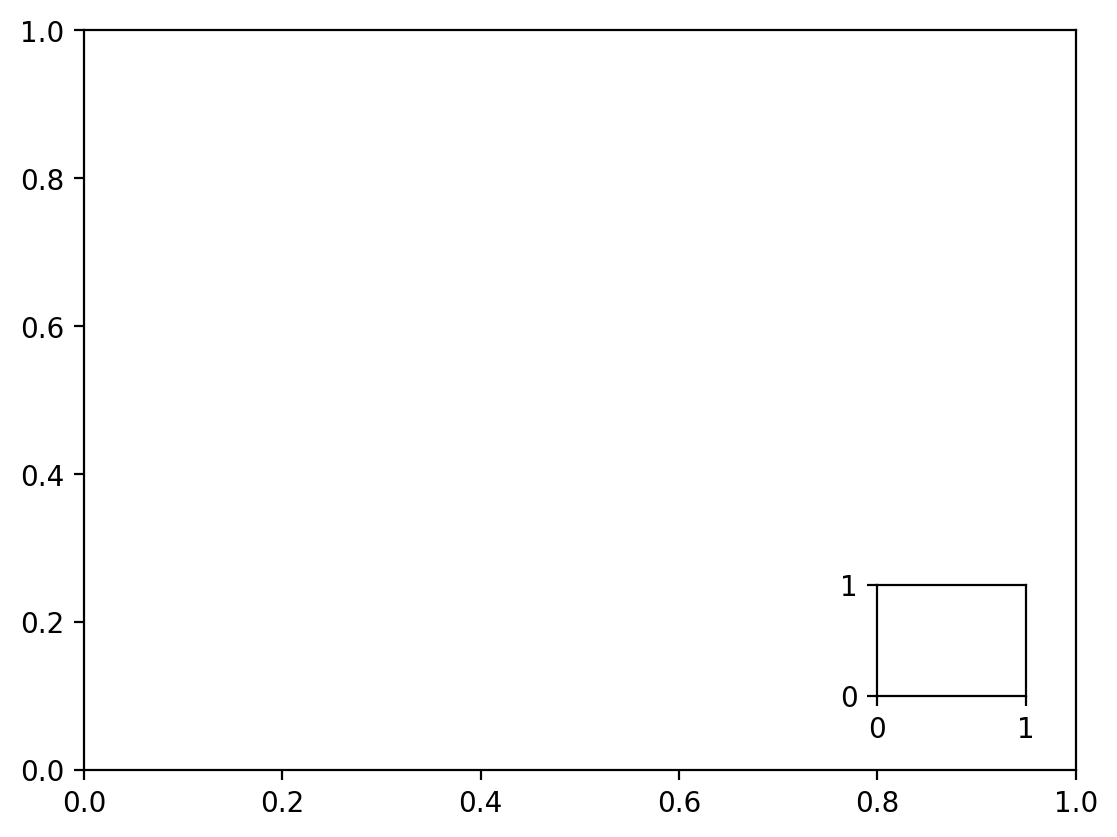

In [ ]:
fig, ax = plt.subplots()
axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
plt.show()

# Our first plot

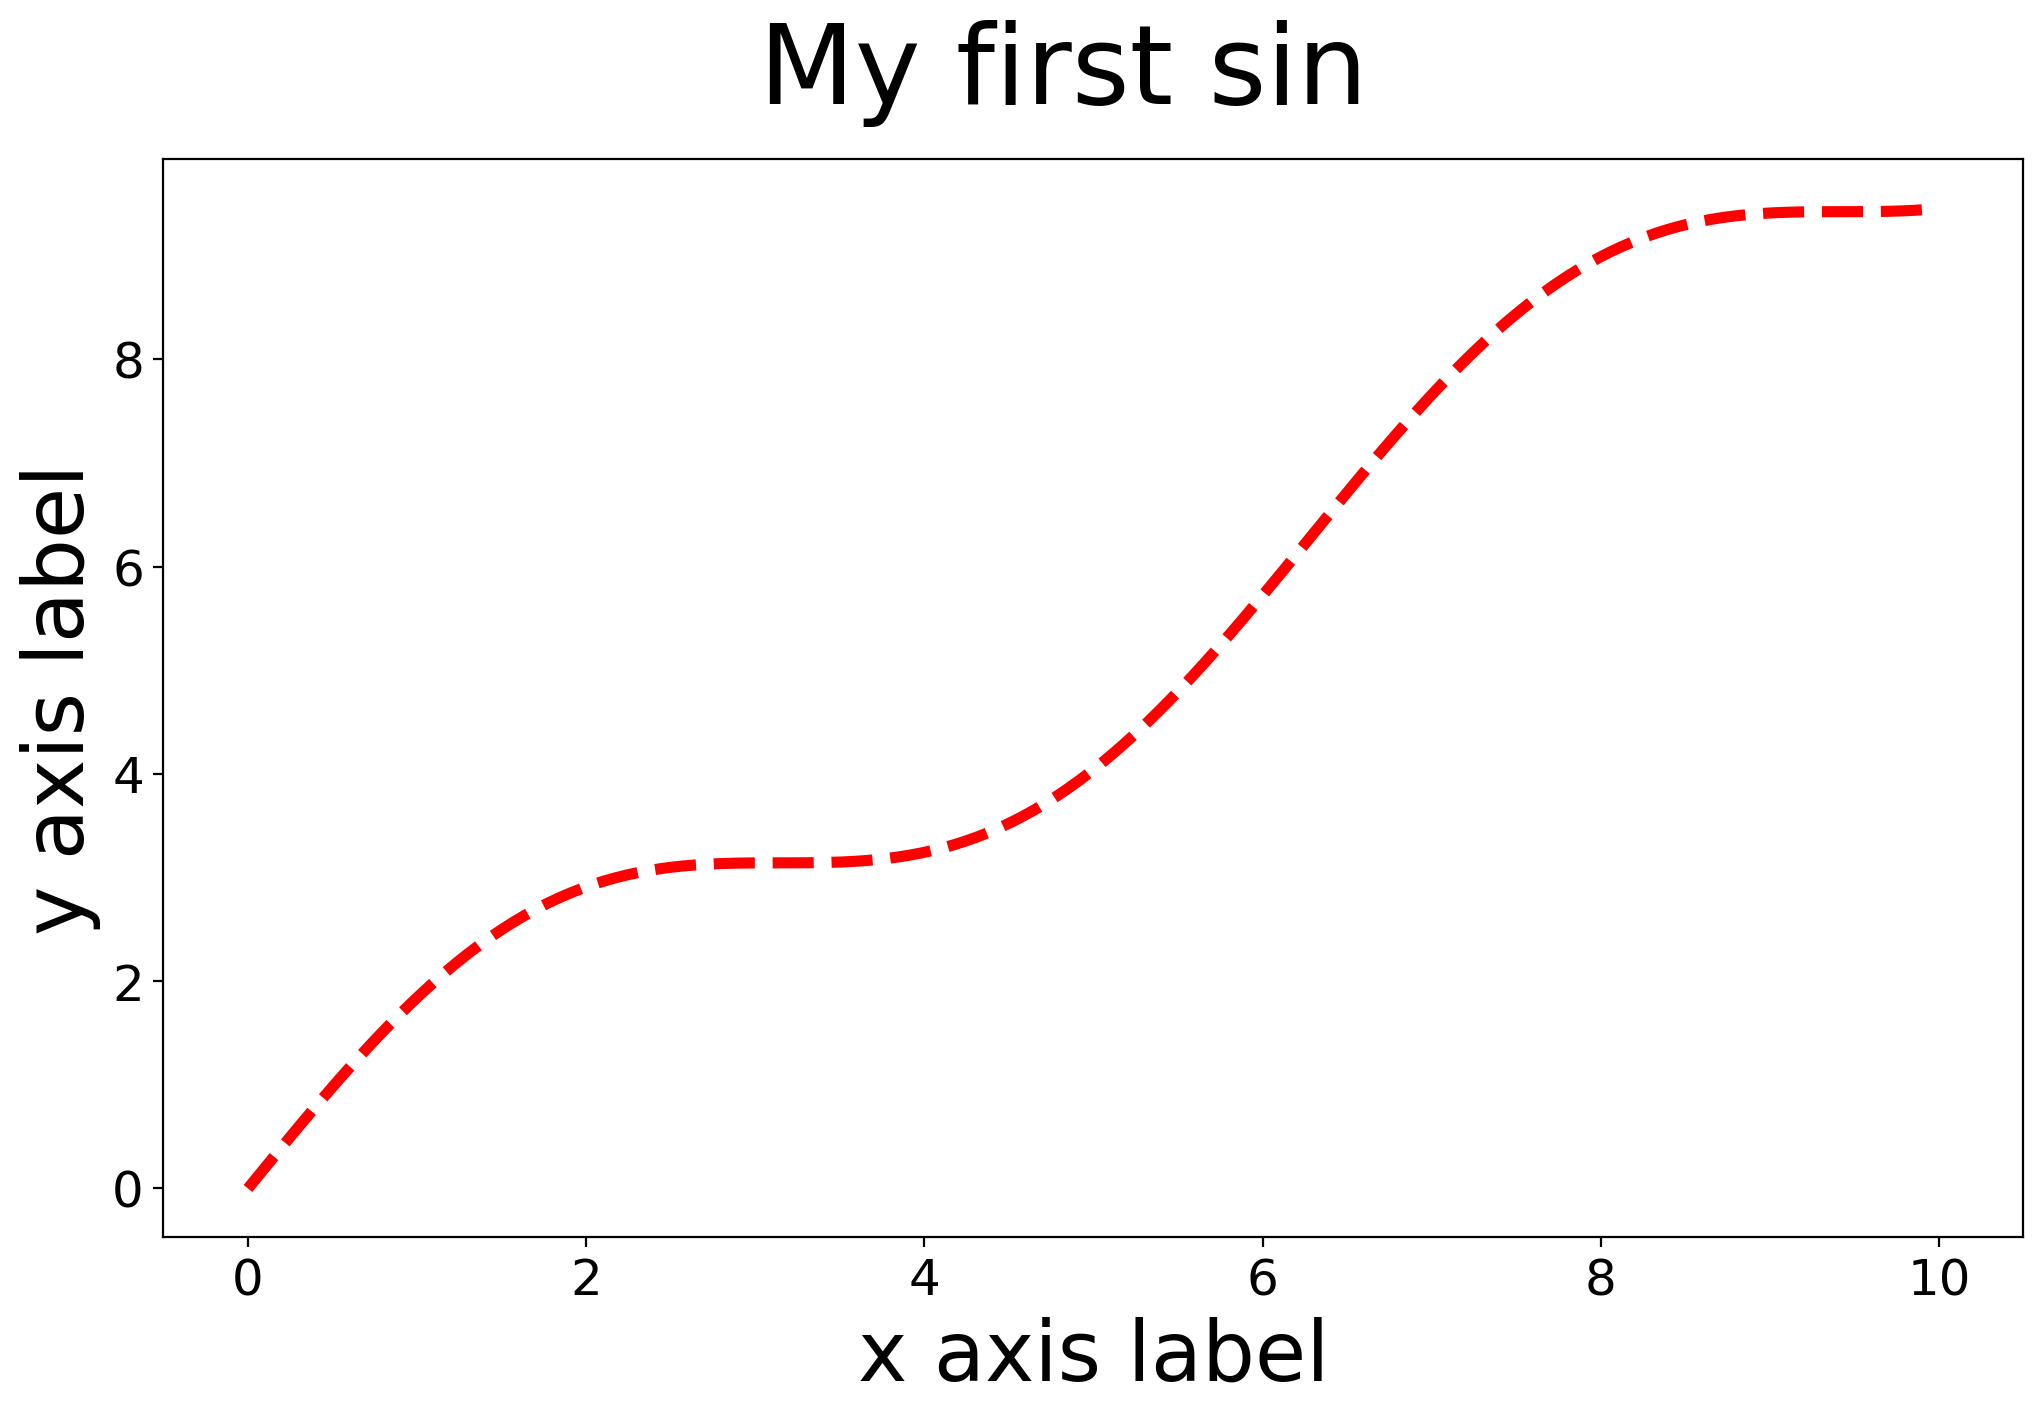

In [ ]:
x = np.linspace(0, 10, 300)
y = np.sin(x) + x

color = 'r'
linestyle = 'dashed'
linewidth = 4

fig, ax = plt.subplots(figsize=(12, 7)) #figsize=(length, width)

fig.suptitle('My first sin', fontsize=40) #set title
ax.set_ylabel('y axis label', fontsize = 30)
ax.set_xlabel('x axis label', fontsize = 30)

#in case you would like to change the size of the numbers on your axis
for xtick in ax.xaxis.get_major_ticks():
    xtick.label1.set_fontsize(18)  # Adjust font size for x-axis tick labels

for ytick in ax.yaxis.get_major_ticks():
    ytick.label1.set_fontsize(18)  # Adjust font size for y-axis tick labels

ax.plot(x, y, c=color, linestyle=linestyle, linewidth=linewidth)
plt.show()

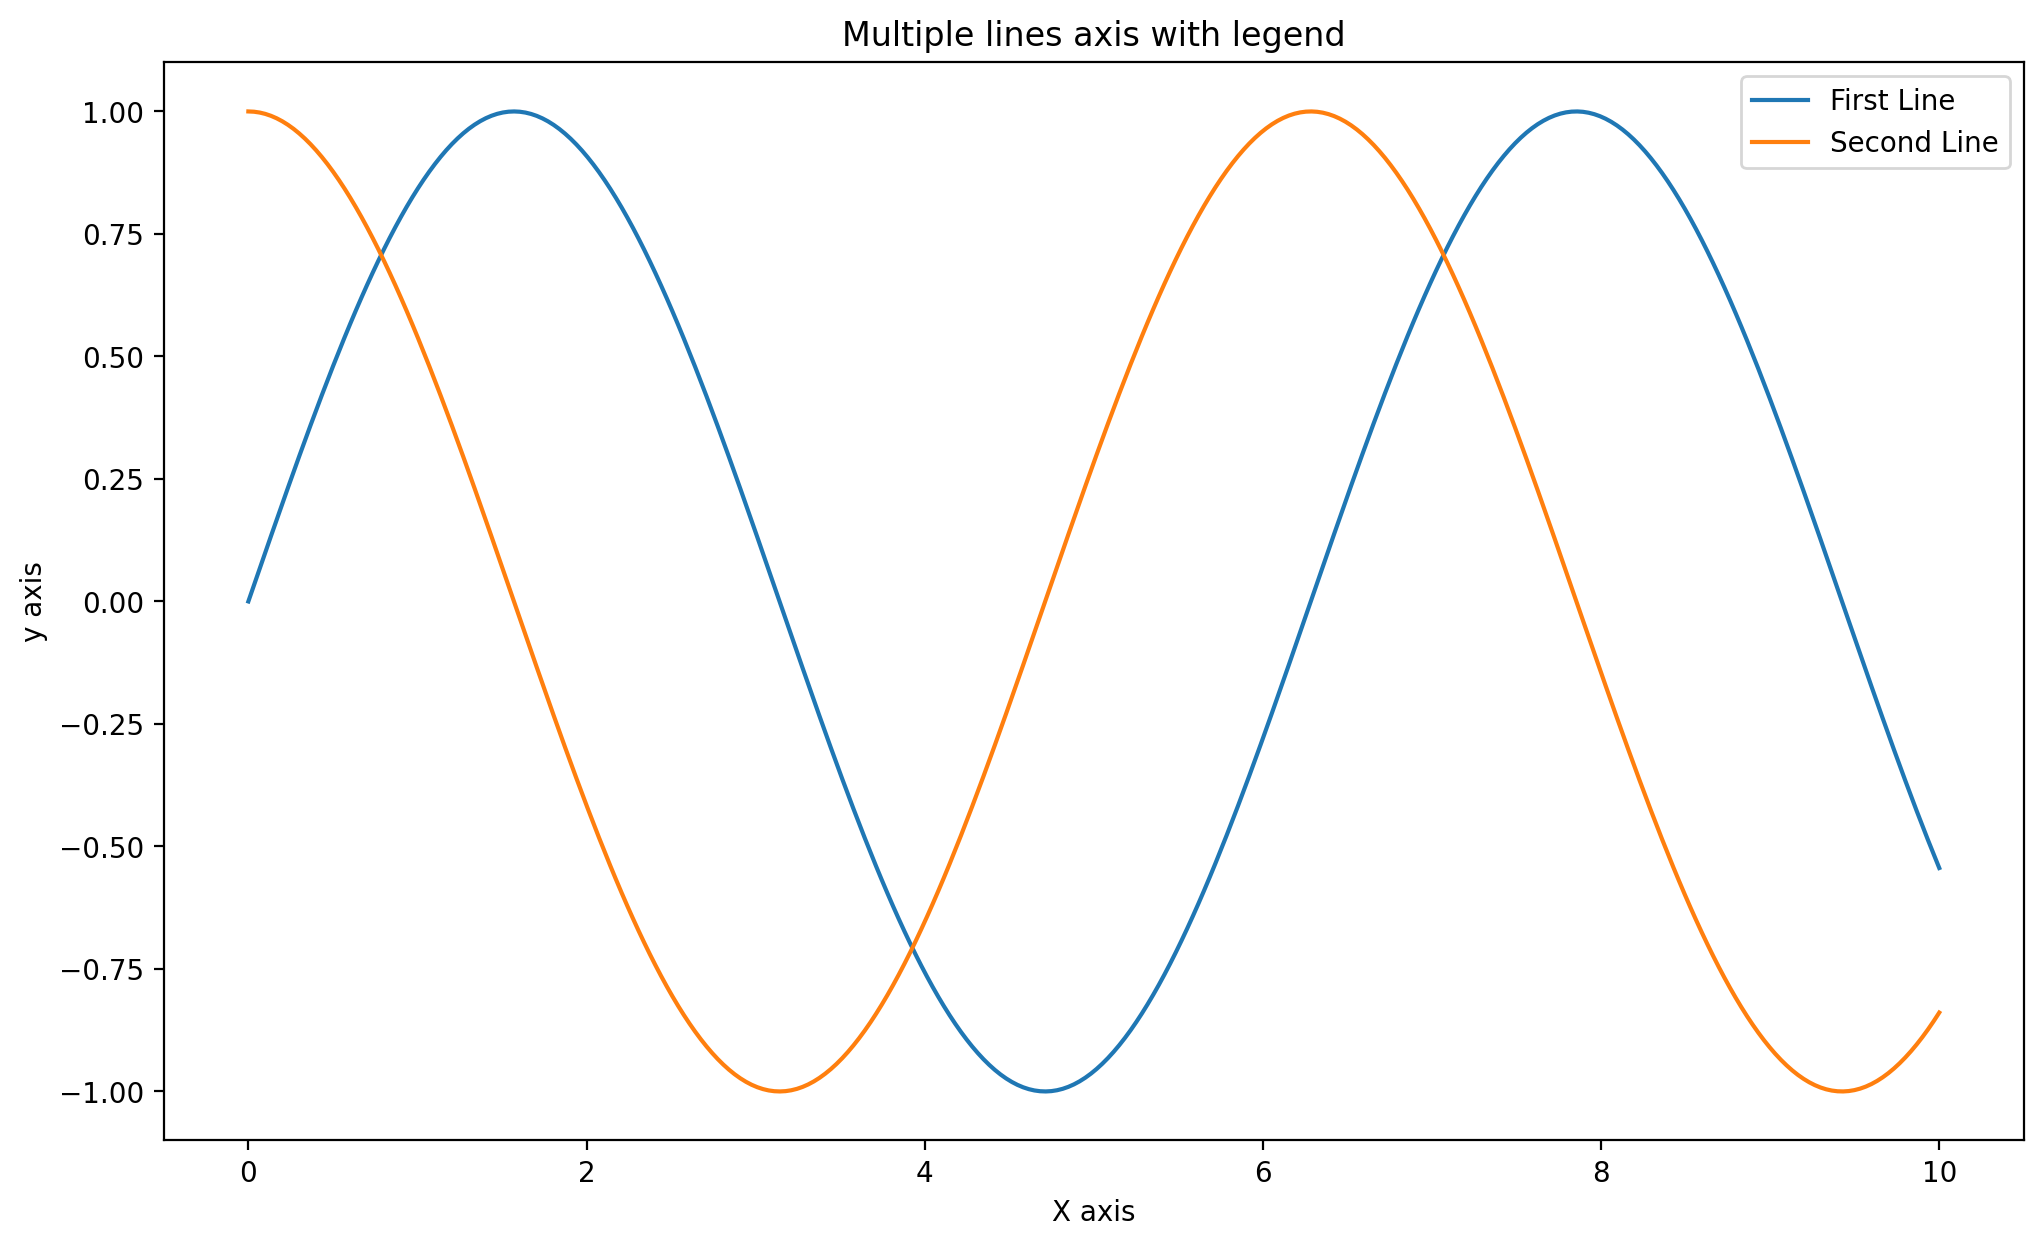

In [ ]:
x = np.linspace(0,10,300)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(figsize=(12, 7))

plt.plot(x, y1, label='First Line')
plt.plot(x, y2, label='Second Line')

plt.xlabel('X axis')
plt.ylabel('y axis')
plt.title('Multiple lines axis with legend')
plt.legend()
plt.show()

# Bar charts

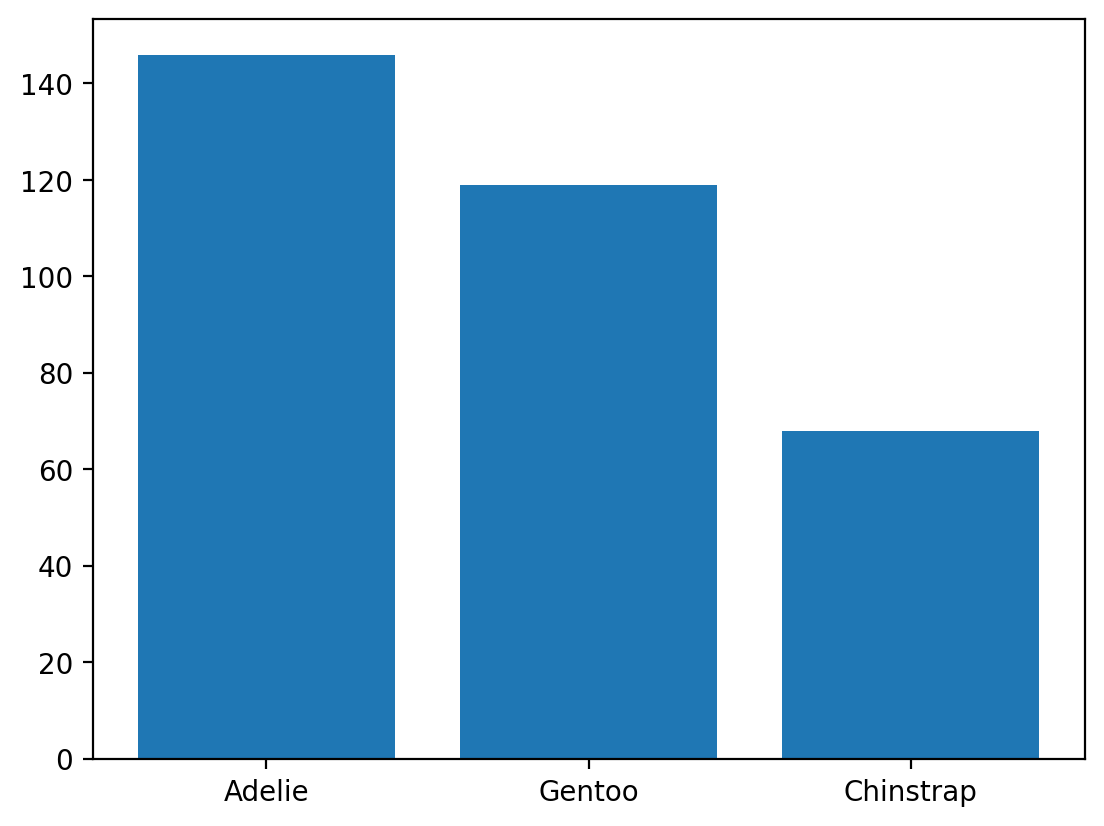

In [ ]:
species = penguins_size["species"].value_counts().index
num_observ = penguins_size["species"].value_counts()

plt.bar(species, num_observ)
plt.show()

In [ ]:
peng_g = penguins_size.groupby('species').mean(numeric_only=True).reset_index()
peng_g = peng_g.set_index('species').T
peng_g

species,Adelie,Chinstrap,Gentoo
culmen_length_mm,38.823973,48.833824,47.568067
culmen_depth_mm,18.347260,18.420588,14.996639
flipper_length_mm,190.102740,195.823529,217.235294
body_mass_g,3706.164384,3733.088235,5092.436975


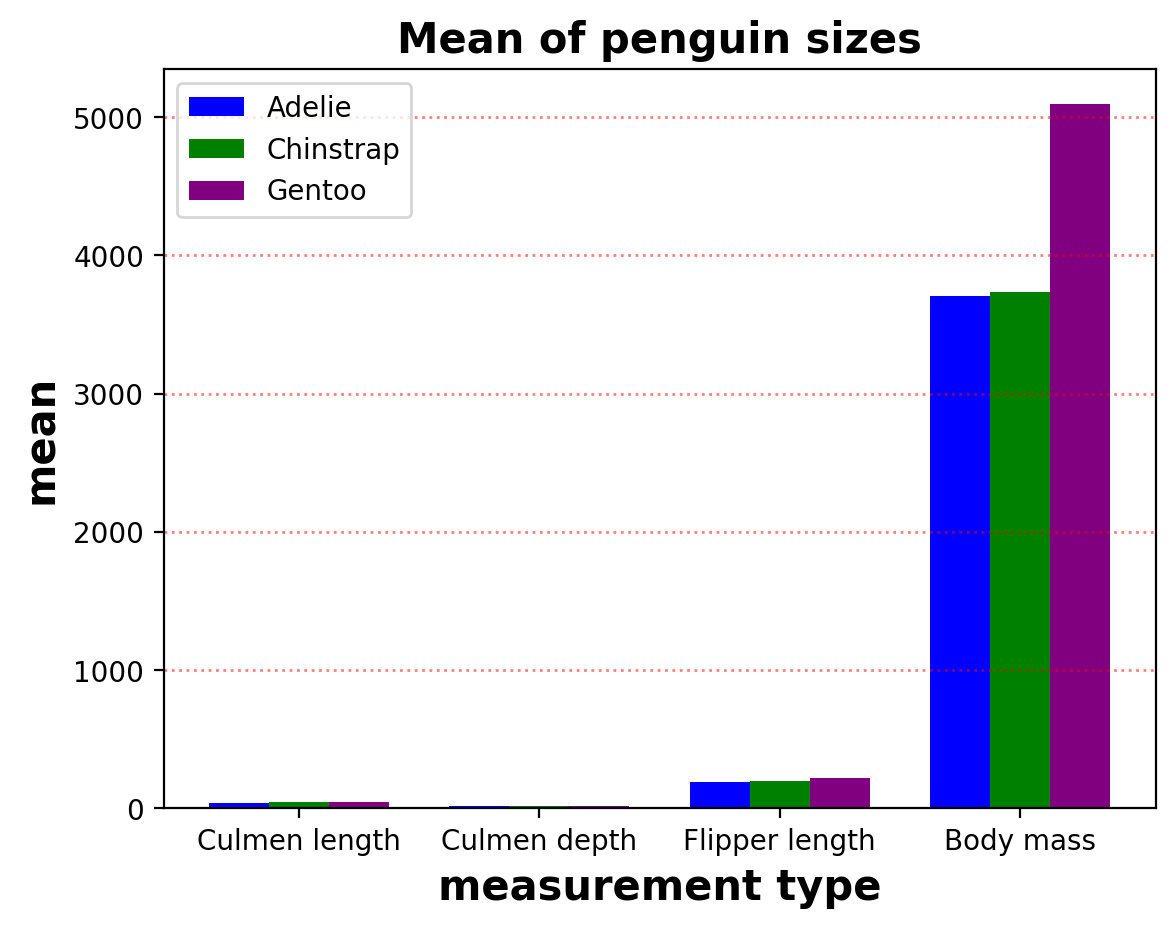

In [ ]:
fig, ax = plt.subplots()

x=np.arange(4)
barWidth = 0.25
plt.bar(x, peng_g['Adelie'], color='blue', label='Adelie', width = barWidth)
plt.bar(x+barWidth, peng_g['Chinstrap'], color='green', label='Chinstrap', width = barWidth)
plt.bar(x+barWidth*2, peng_g['Gentoo'], color='purple', label='Gentoo', width = barWidth)

# for plotting the chart horizontally use: plt.barh

# add grid lines
plt.grid(color='red', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)

plt.ylabel('mean', fontweight ='bold', fontsize = 15)  # labling y-axis
plt.xlabel('measurement type', fontweight ='bold', fontsize = 15)  # labling x-axis
plt.title('Mean of penguin sizes', fontweight ='bold', fontsize = 15)
ax.set_xticks(x+barWidth)
ax.set_xticklabels(('Culmen length', 'Culmen depth', 'Flipper length', 'Body mass'))

plt.legend()
plt.show()

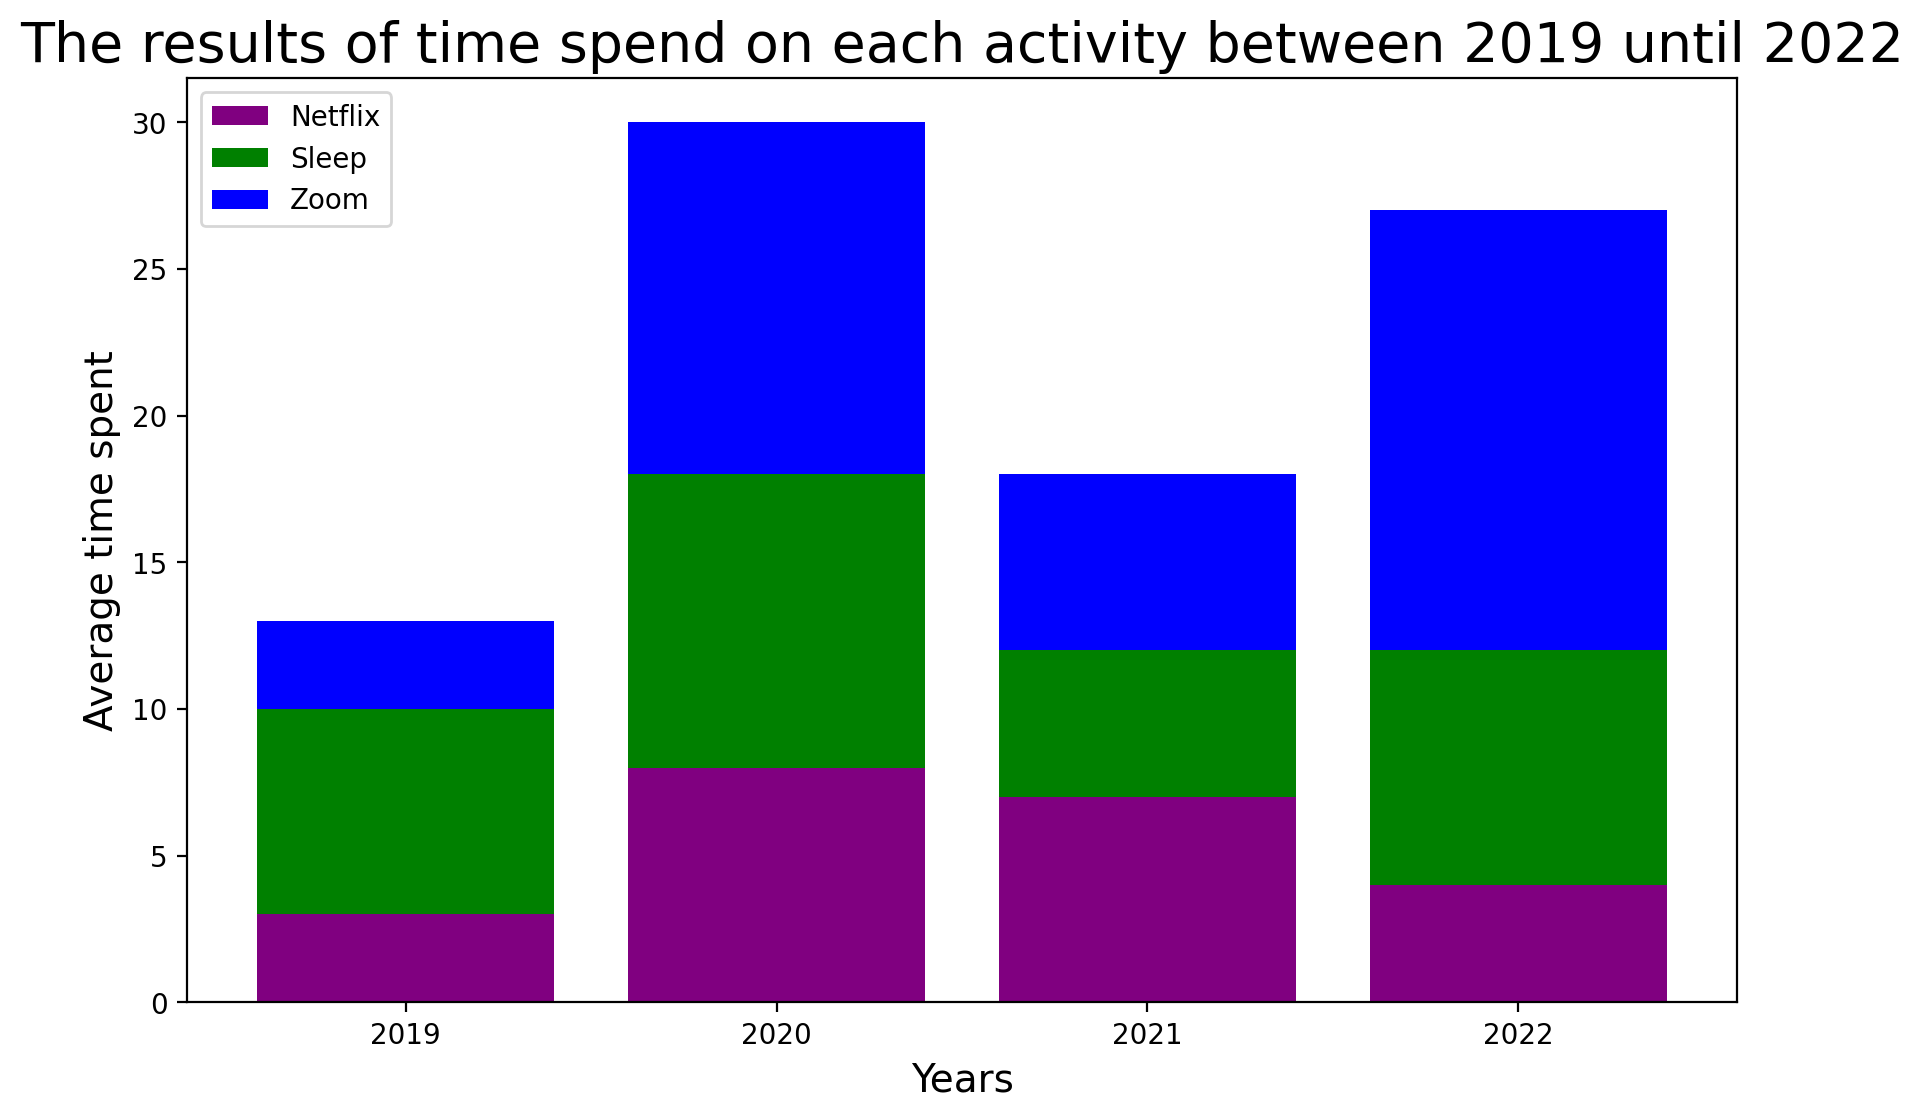

In [ ]:
years = ['2019', '2020', '2021', '2022']
netflix =  np.array([3, 8, 7, 4])
sleep =  np.array([7, 10, 5, 8])
zoom =  np.array([3, 12, 6, 15])

plt.figure(figsize=(10, 6))

plt.bar(years, netflix, label='Netflix', color='purple')
plt.bar(years, sleep, bottom=netflix, label='Sleep', color='green')
plt.bar(years, zoom, bottom=netflix+sleep, label='Zoom', color='blue')

plt.xlabel('Years', fontsize=14)
plt.ylabel('Average time spent', fontsize=14)
plt.title('The results of time spend on each activity between 2019 until 2022', fontsize=20)
plt.legend()
plt.show()

# Pie chart

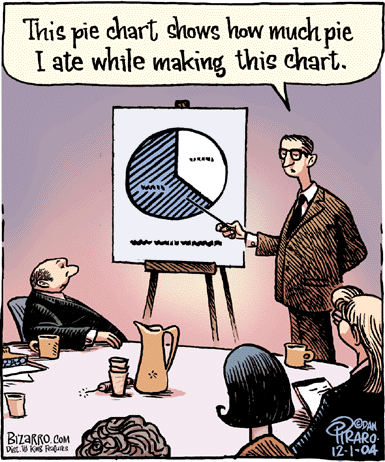

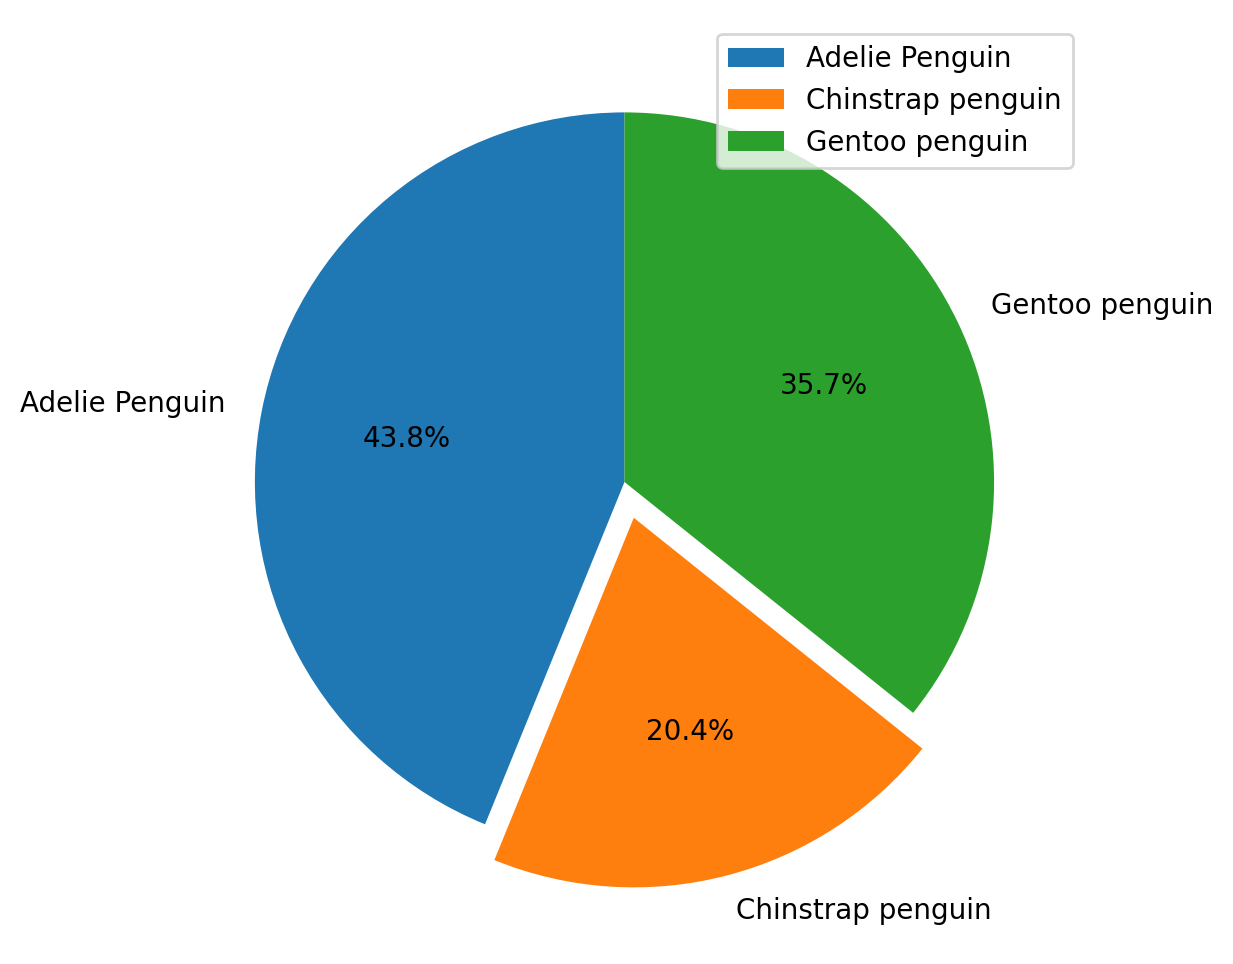

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

explode = [0.0, 0.10, 0.0] #allows separating slices of a pie chart

#Find the percentage
penguin_spe = penguins_size.groupby('species').count().reset_index()
labels = ['Adelie Penguin', 'Chinstrap penguin' , 'Gentoo penguin']
plt.pie(penguin_spe['island'], labels=labels, explode=explode, autopct='%1.1f%%', startangle=90) #autopct = to display value here we also added the % sign
#you can add a shadow with shadow=True
#startangle = define the angle where we want to initiate our pie, by default it's 0
# for a doughnut shape: wedgeprops={'width': (insert number try 0.2 or 0.4)}
plt.legend(labels)
plt.show()

# Color maps for visualization

Documentation

https://matplotlib.org/stable/tutorials/colors/colormaps.html

Websites to choose color pallets

https://coolors.co/

https://imagecolorpicker.com/


In [ ]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

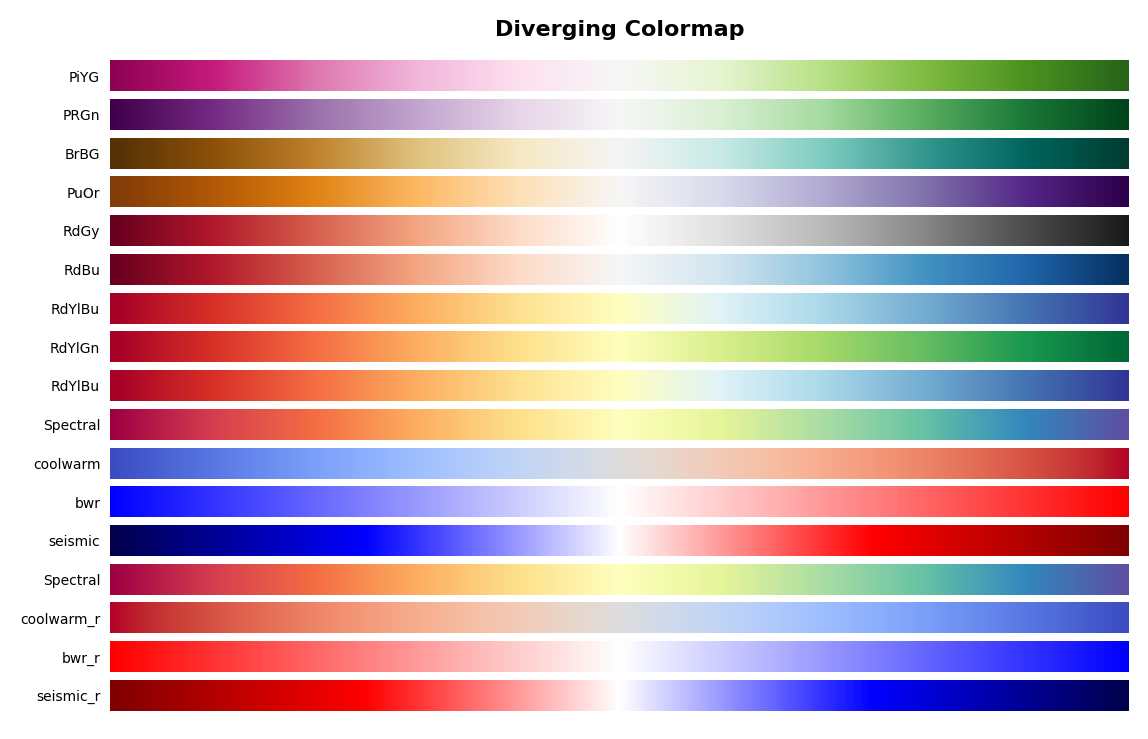

In [ ]:
diverge_cmap = ('PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                'RdYlGn', 'RdYlBu', 'Spectral', 'coolwarm', 'bwr', 'seismic',
                'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
# coolwarm_r: the r here means reversed
cmap_plot(diverge_cmap, 'Diverging')

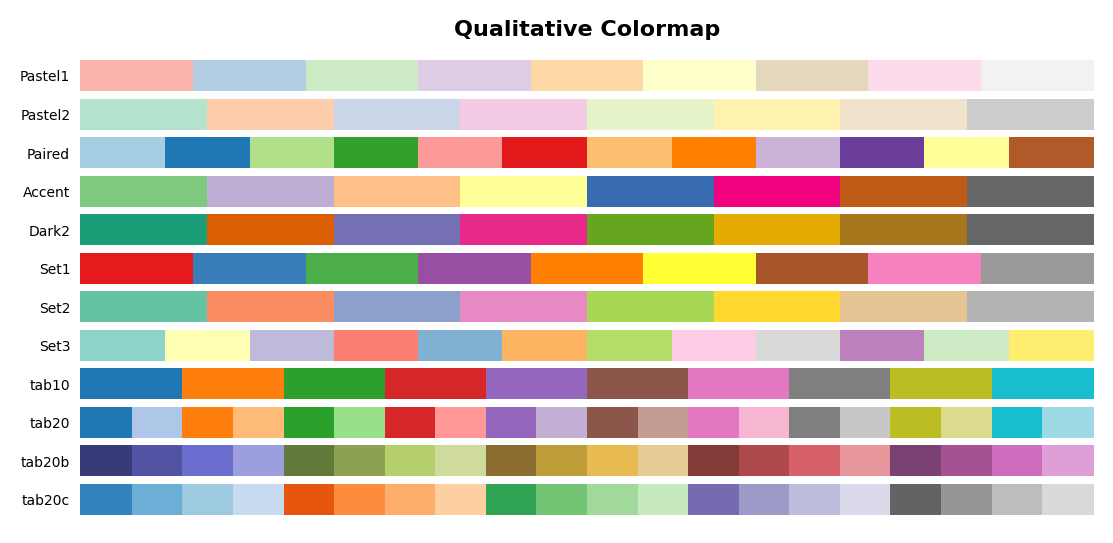

In [ ]:
qualitative_cmap = ('Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                    'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                    'tab20c')

cmap_plot(qualitative_cmap, 'Qualitative')

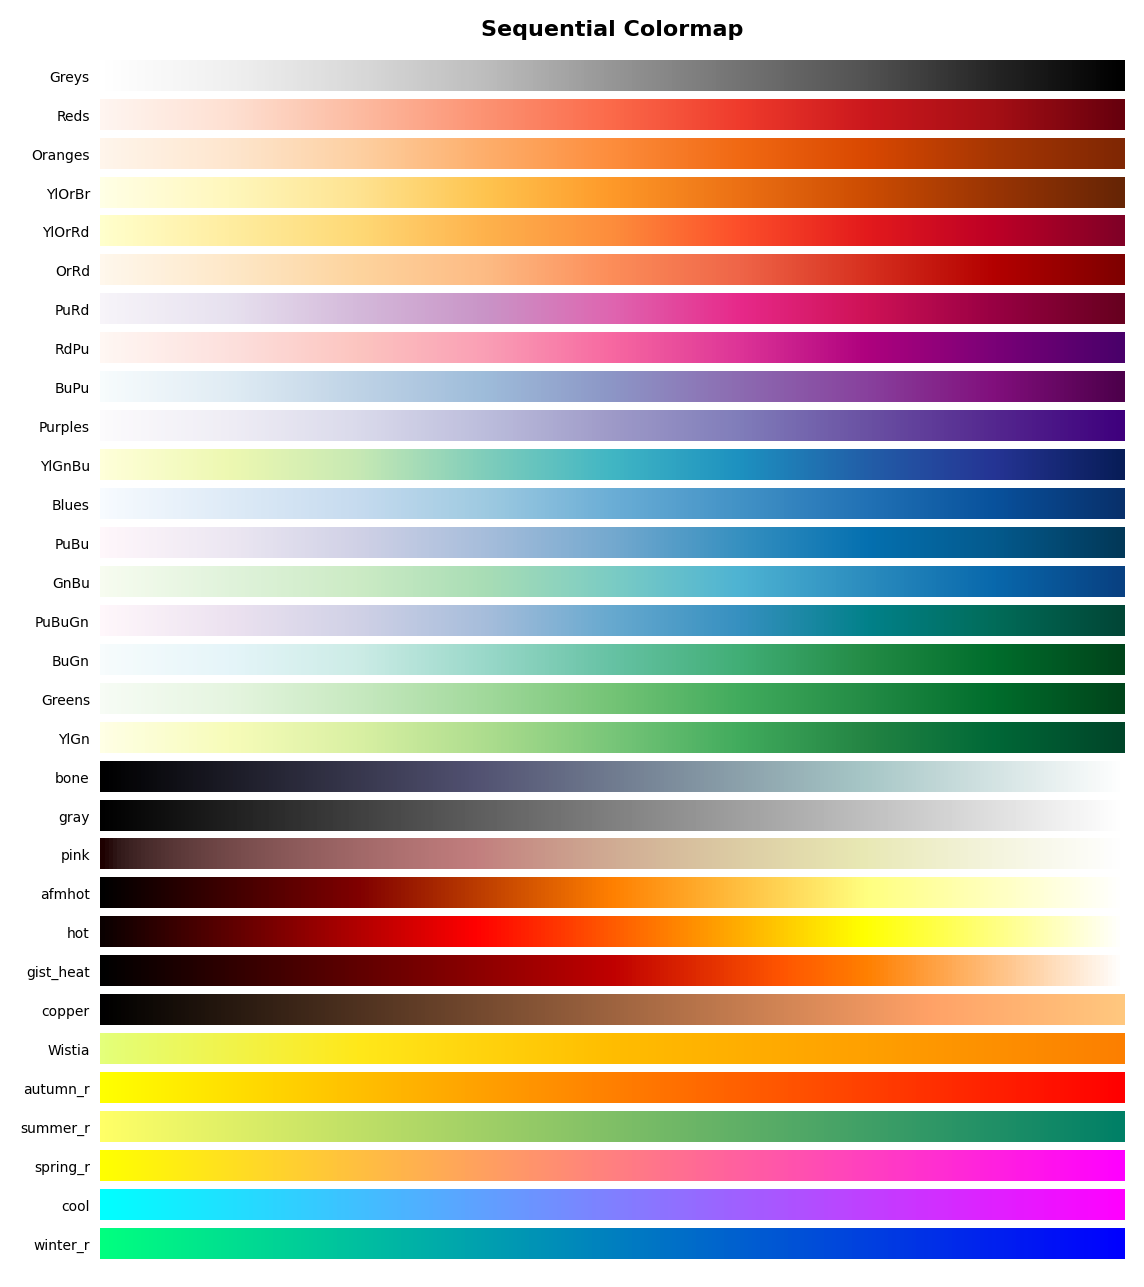

In [ ]:
sequential_cmap = ('Greys', 'Reds', 'Oranges',
                   'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                   'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
                   'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper',
                   'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')

cmap_plot(sequential_cmap, 'Sequential')

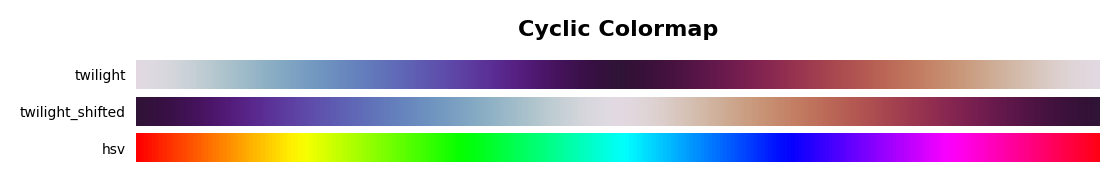

In [ ]:
cyclic_cmap = ('twilight', 'twilight_shifted', 'hsv')

cmap_plot(cyclic_cmap, 'Cyclic')

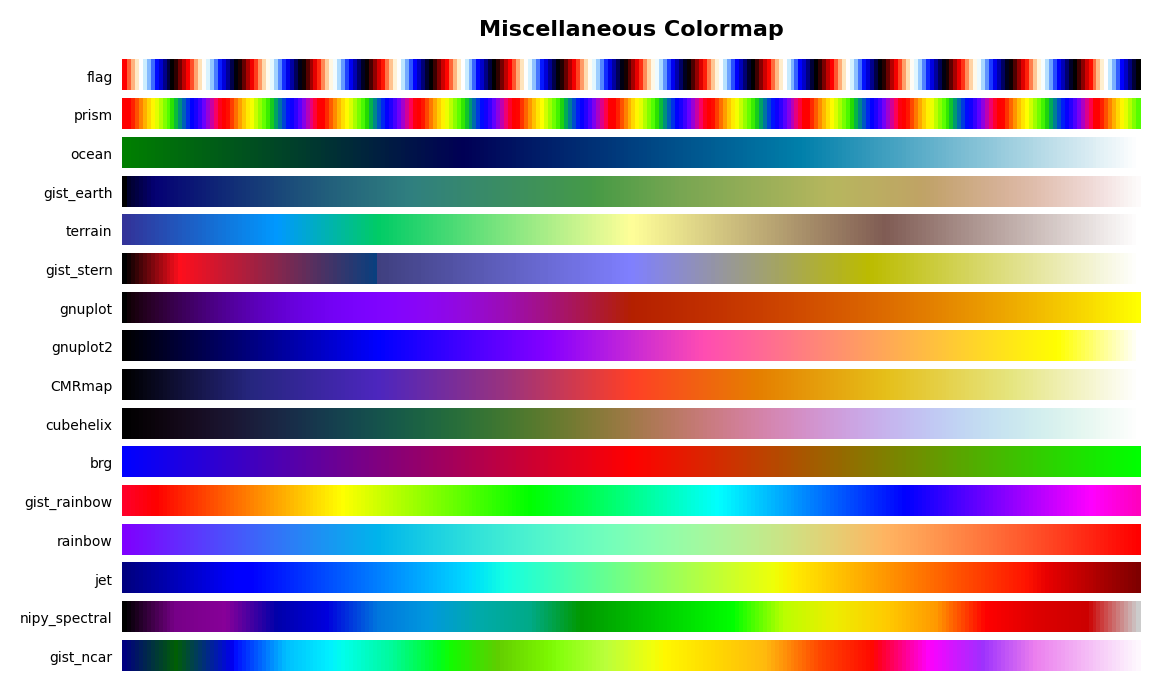

In [ ]:
miscellaneous_cmap = ('flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'nipy_spectral', 'gist_ncar')

cmap_plot(miscellaneous_cmap, 'Miscellaneous')

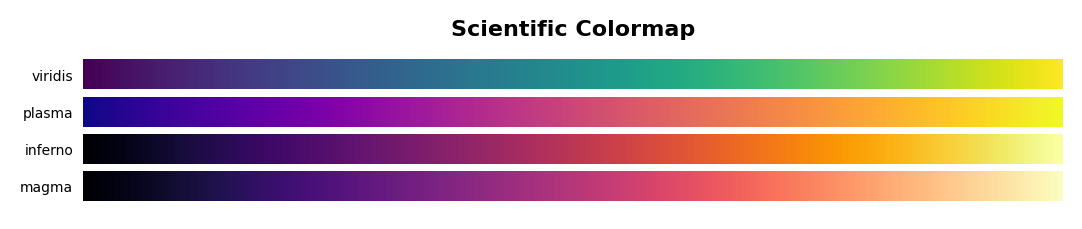

In [ ]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

# Heatmap

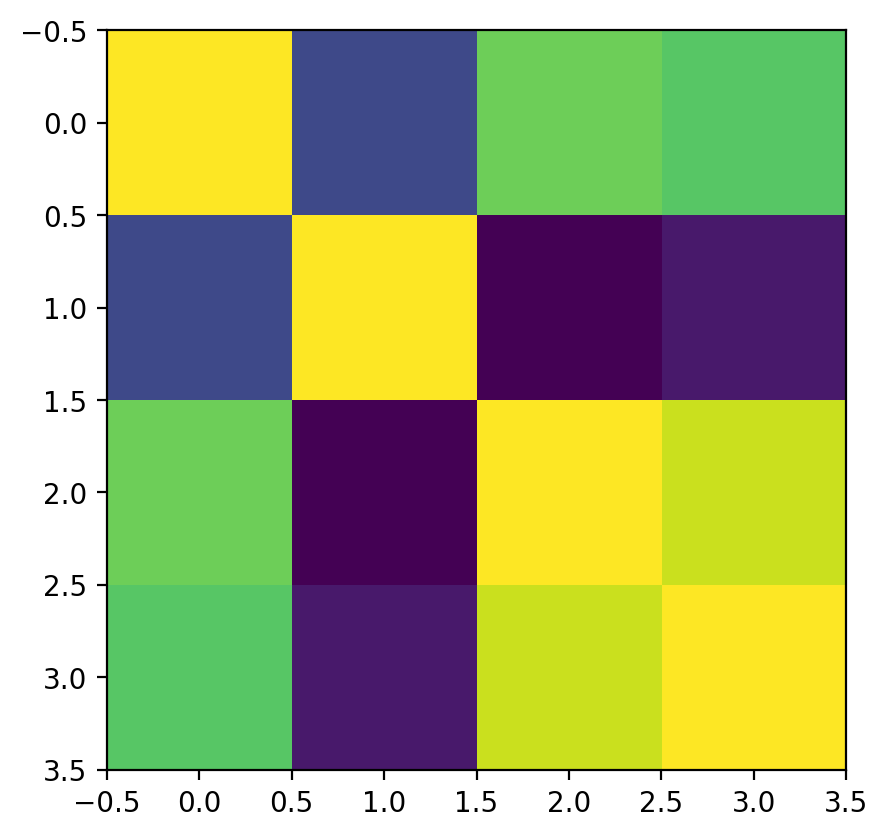

In [ ]:
#simple heatmap

plt.imshow(penguins_size.corr(numeric_only=True))

<Axes: >

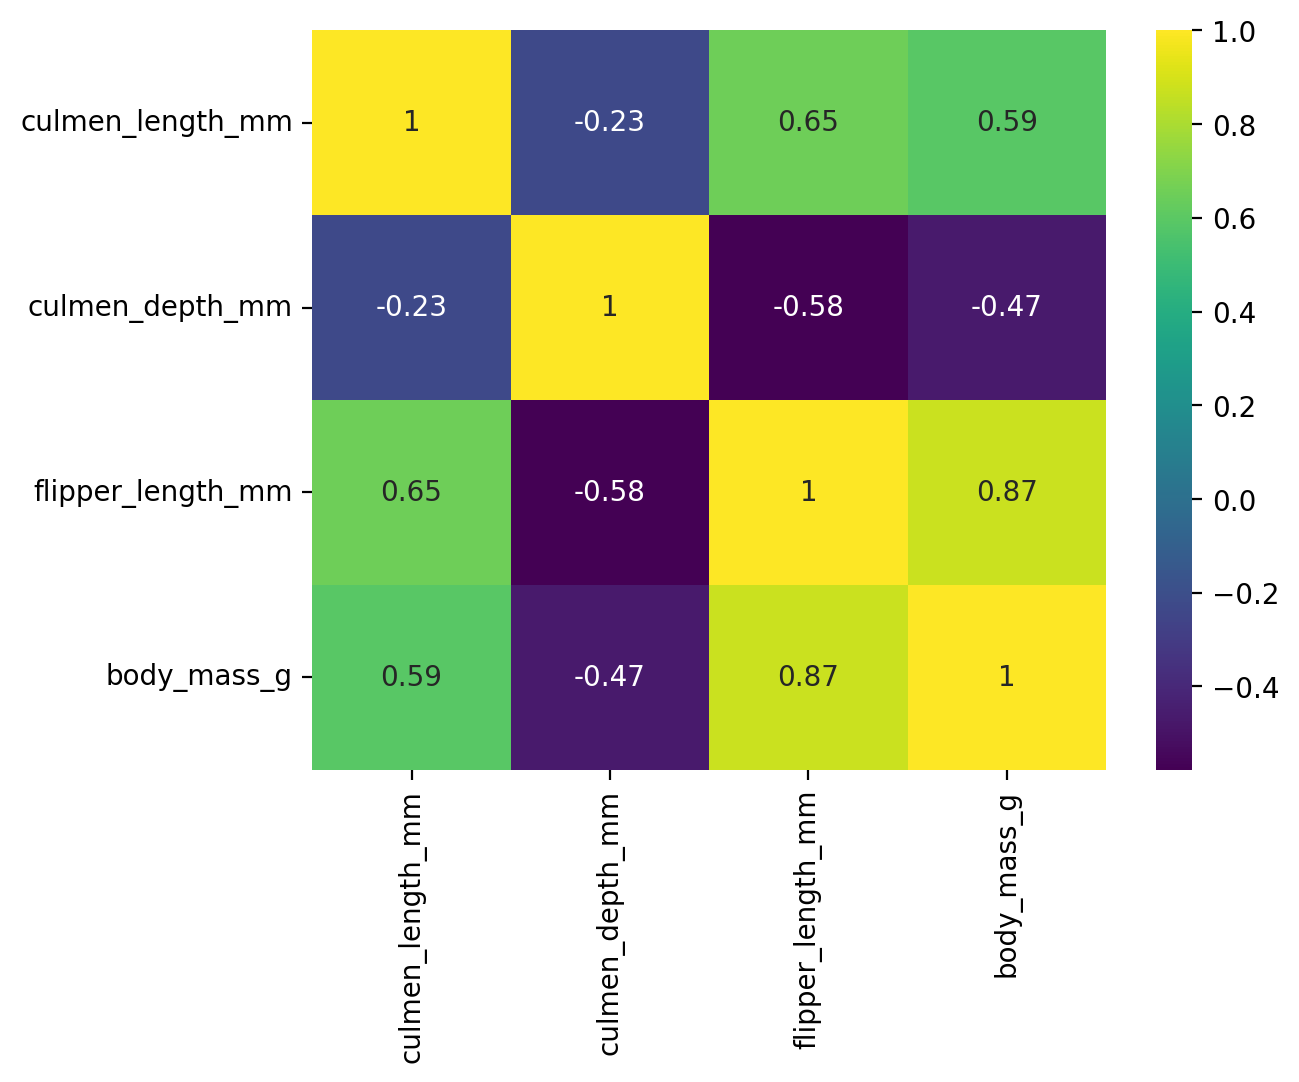

In [ ]:
sns.heatmap(penguins_size.corr(numeric_only=True), annot = True, cmap = 'viridis') #change the cmap to your liking

# Text and Annotate

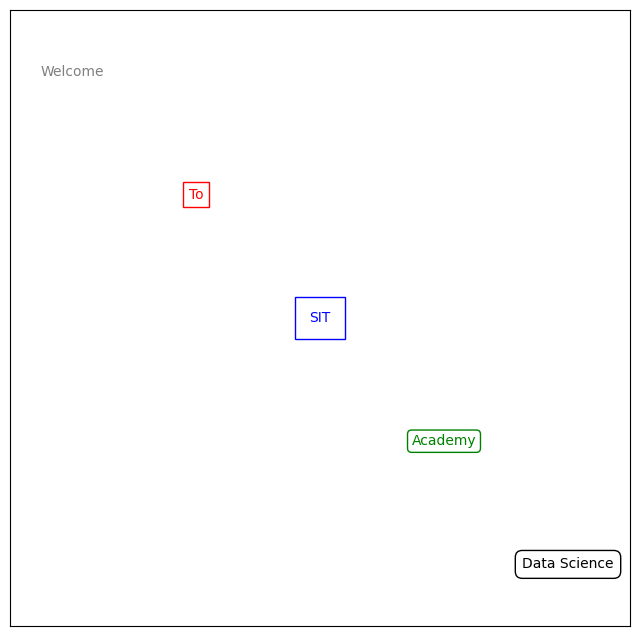

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

## ax.text
##The first two numbers represent the ratio coordinates in the graph
## Gray Box
ax.text(0.1, 0.9, 'Welcome', color='gray', va="center", ha="center")

#va, ha is a parameter that determines whether the current coordinate is the center of the text or the left / right of the text.

## Red Box
ax.text(0.3, 0.7, 'To', color='red', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='red')) #bbox sets an element for the box that wraps the text.

## Blue Box
ax.text(0.5, 0.5, 'SIT', color='blue', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))

# Green Box
ax.text(0.7, 0.3, 'Academy', color='green', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))

# Black
ax.text(0.9, 0.1, 'Data Science', color='black', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round, pad=0.5'))

ax.set_xticks([])
ax.set_yticks([])

plt.show()

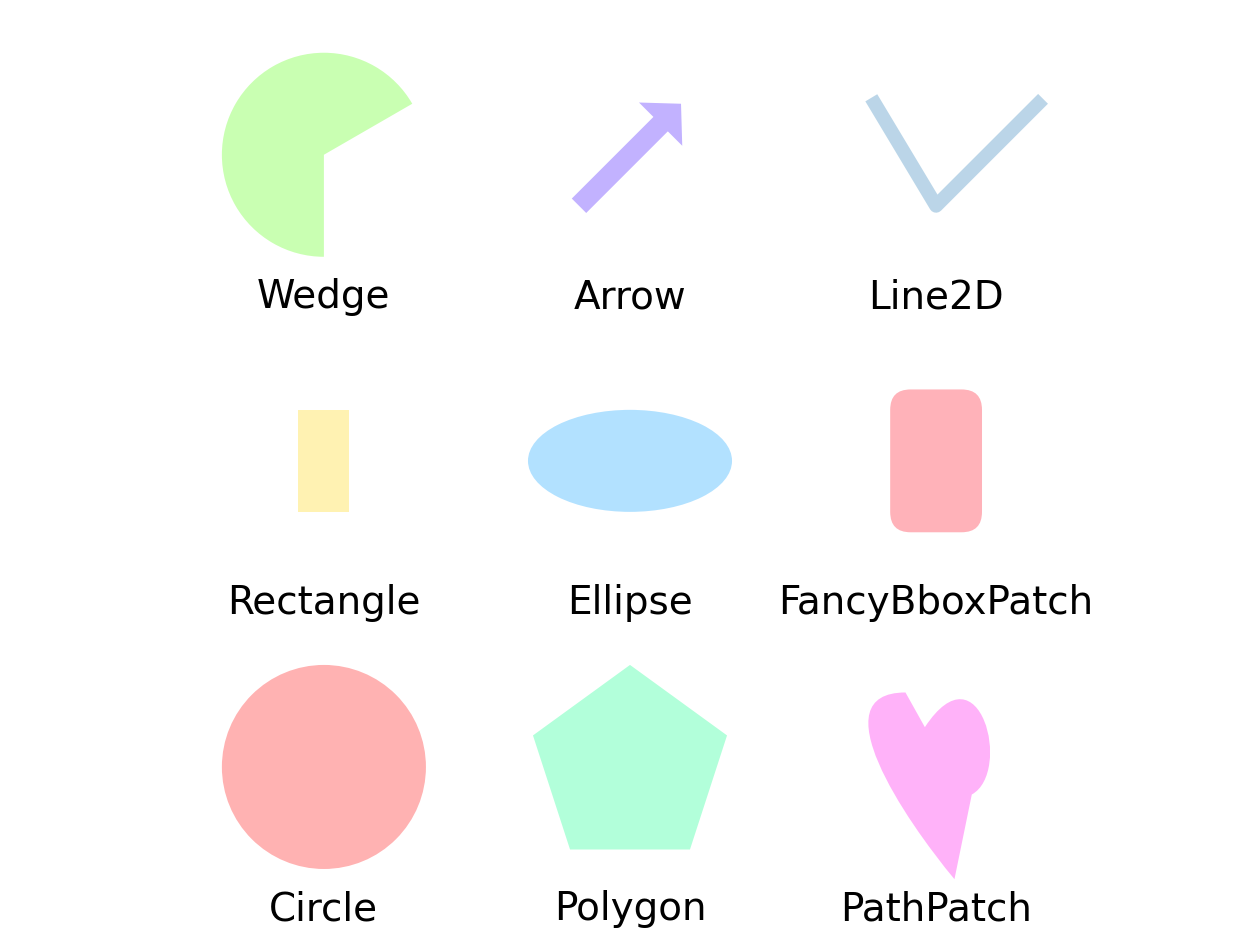

In [ ]:
#Let's draw some shapes, important when you want to emphasize something in your graph

def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], numVertices=5, radius=0.1, edgecolor="none")
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

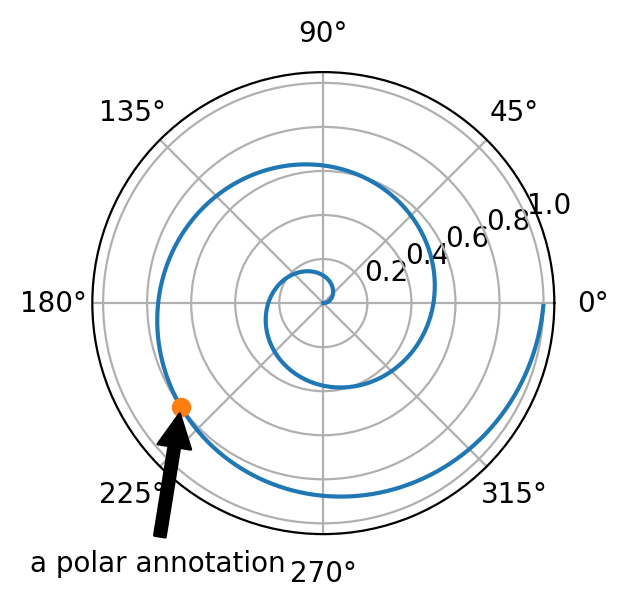

In [ ]:
# Let's annotate

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(3, 3))
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')

ax.annotate('a polar annotation',
            #xy represent the coordinates in the graph
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')
plt.show()

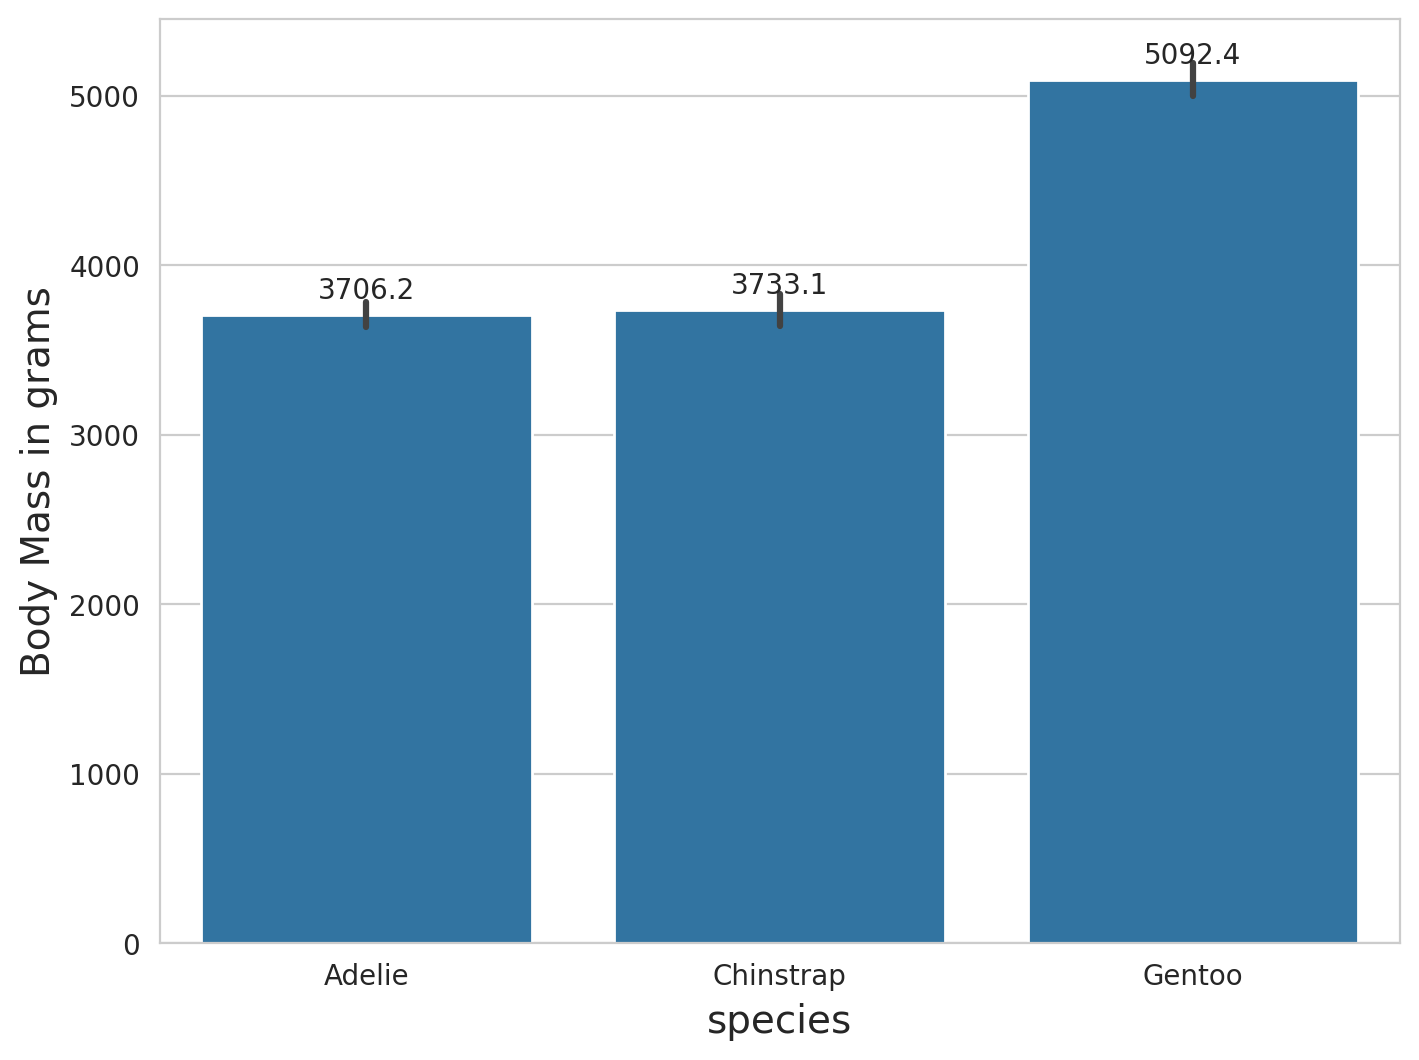

In [ ]:
# bar plot improved with annotation and colors

sns.set_style('whitegrid') # plot with grid

plt.figure(figsize=(8, 6))
splot=sns.barplot(x="species",y="body_mass_g",data=penguins_size)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("species", size=14)
plt.ylabel("Body Mass in grams", size=14)
plt.show()

# Scatter plots

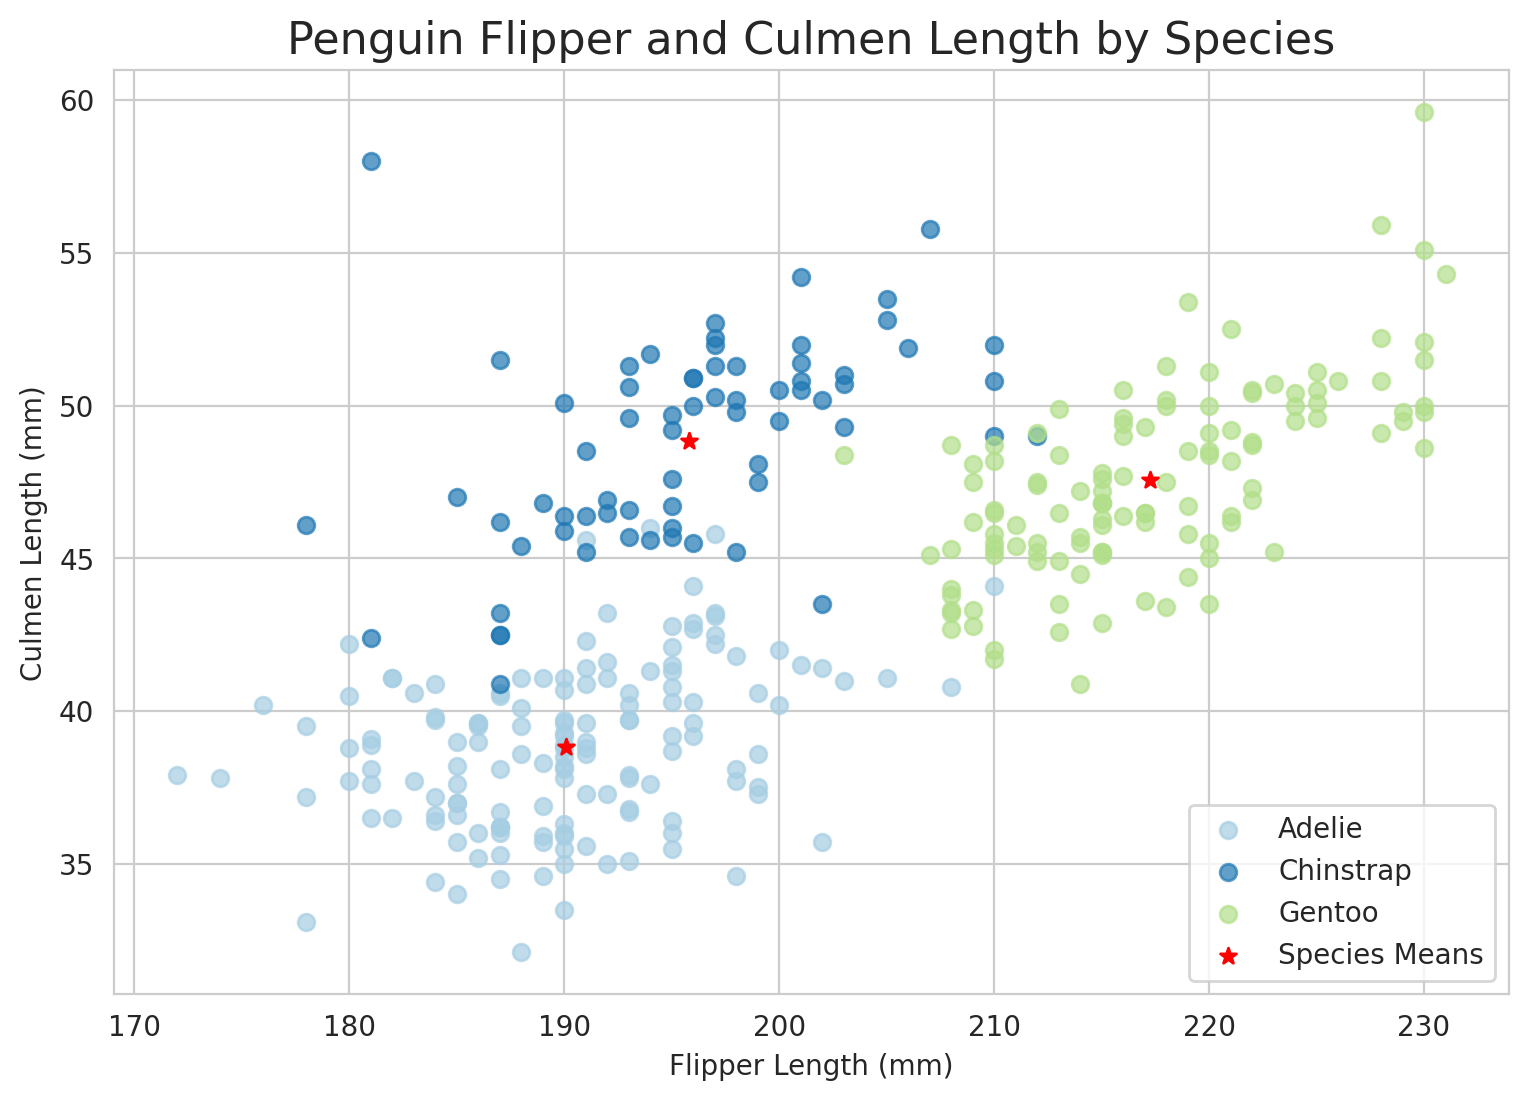

In [ ]:
#Transparency

# We can select a color palette from seaborn and use it in all the plots.
colors = sns.color_palette("Paired")

# Grouped Scatter Plot with Means
species_means = penguins_size.groupby("species").mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(9, 6))

for i, (grp, df) in enumerate(penguins_size.groupby("species")):
    ax.scatter(x=df["flipper_length_mm"], y=df["culmen_length_mm"],     # adding one layer for each group with colors and labels assigned
               label=grp, color=colors[i], alpha=0.7) #alpha : Parameter name of normal transparency setting

ax.scatter(x=species_means["flipper_length_mm"], y=species_means["culmen_length_mm"],    # one more layer for the means
           label="Species Means", color="red", marker="*")

ax.legend(loc="lower right")
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Culmen Length (mm)")

plt.title("Penguin Flipper and Culmen Length by Species", fontsize=16);   # the ';' removes unwanted text output

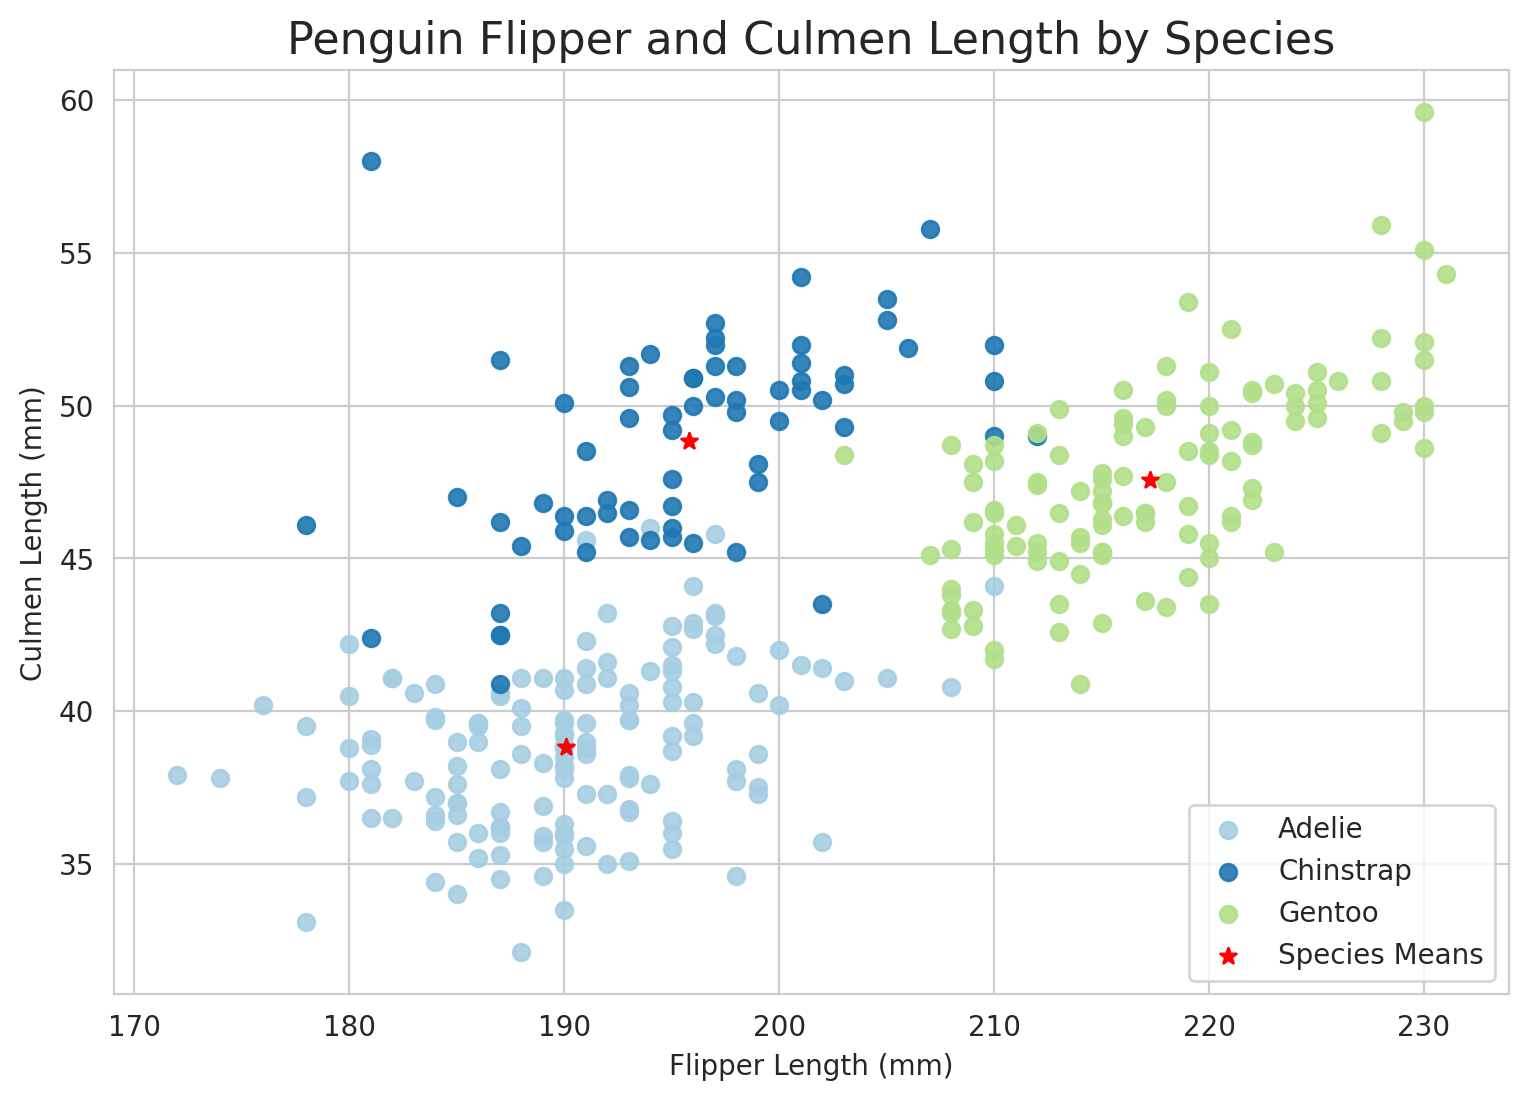

In [ ]:
#Transparency

colors = sns.color_palette("Paired")

species_means = penguins_size.groupby("species").mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(9, 6))

for i, (grp, df) in enumerate(penguins_size.groupby("species")):
    ax.scatter(x=df["flipper_length_mm"], y=df["culmen_length_mm"],
               label=grp, color=colors[i], alpha=0.9) #alpha changed

ax.scatter(x=species_means["flipper_length_mm"], y=species_means["culmen_length_mm"],
           label="Species Means", color="red", marker="*")

ax.legend(loc="lower right")
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Culmen Length (mm)")

plt.title("Penguin Flipper and Culmen Length by Species", fontsize=16);

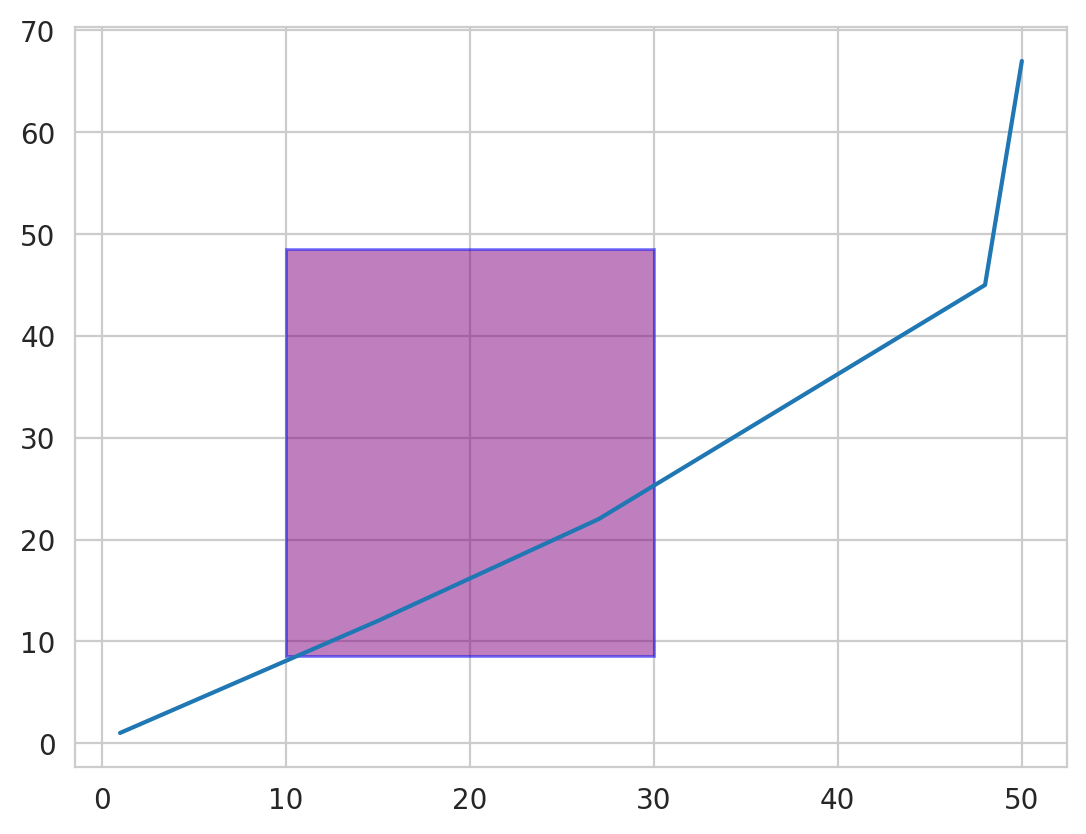

In [ ]:
# adding Span

# axvspan : vertical span
# axhspan : horizontal span

x =[1, 15, 27, 48, 50]
y =[1, 12, 22, 45, 67]

plt.plot(x, y)

# Setting alpha will make
# the rectangle transparent
plt.axvspan(10, 30, ymin = 0.15,
            ymax = 0.70, ec ='blue',
            color ='purple',
            alpha = 0.5)

plt.show()

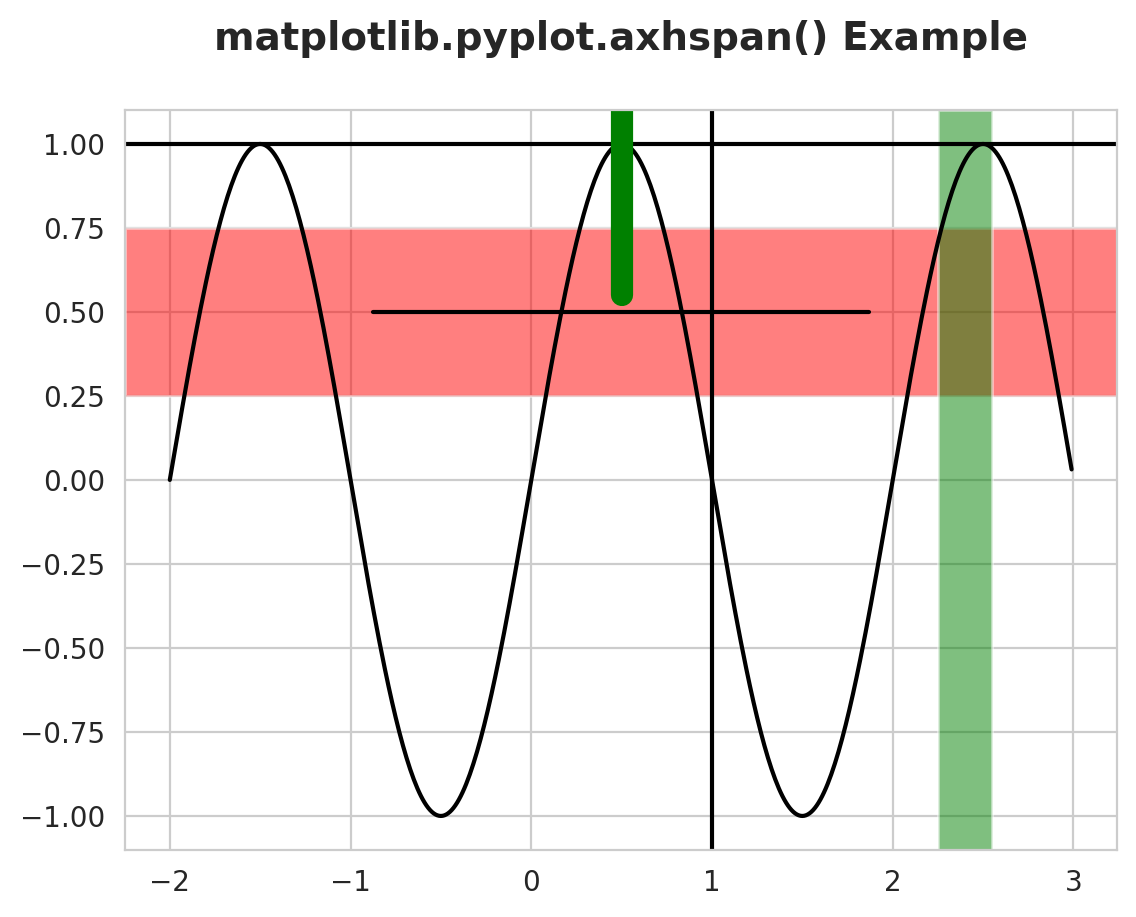

In [ ]:
t = np.arange(-2, 3, .01)
s = np.sin(np.pi * t)

plt.plot(t, s, color ='black')
plt.axhline(y = 1, color ='black')

plt.axvline(x = 1, color ='black')
plt.axvline(x = 0.5, ymin = 0.75, linewidth = 8,
            color ='green')

plt.axhline(y =.5, xmin = 0.25, xmax = 0.75,
            color ='black')

plt.axhspan(0.25, 0.75, facecolor ='red', alpha = 0.5)
plt.axvspan(2.25, 2.55, facecolor ='green', alpha = 0.5)

plt.title('matplotlib.pyplot.axhspan() Example\n',
          fontsize=14, fontweight='bold')

plt.show()

# End of Notebook